# Podcast Reviews

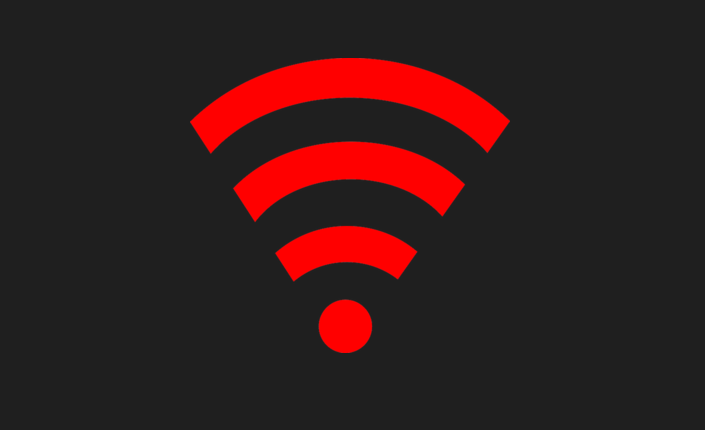

# Introduction

“Your most unhappy customers are your greatest source of learning.” — Bill Gates

Many qualities would make a good podcast. In this report, I analyzed nearly 2 million reviews by listeners of over 100,000 podcasts. Using sentiment analysis and inferential statistics, I hoped to arrive at insights that could potentially be useful to current and future podcast creators. 

# Goal

To provide usable information for creating good podcasts or improving the quality of existing ones. 

# Technical Requirements

I adhered to the following technical requirements: 

1. Download the data.
2. Load data using SQLite and Pandas.
3. Perform exploratory data analysis.
4. Provide clear explanations. 
5. Provide suggestions about how the analysis can be improved.

# Standards

Below is a summary of the standards I followed to create this report. 

>* **Standard 1:** For parts of my analysis, I combined 4-star and 5-star rated reviews and counted them as positive. I combined 1-star and 2-star reviews and counted them as negative. I counted the 3-star reviews as neutral.
>* **Standard 2:** I did not analyze emojis.
>* **Standard 3:** I did not analyze non-English text.
>* **Standard 4:** I deleted rows with no review content.
>* **Standard 5:** I removed "no," and "not" from the list of standard stop words in the NLTK library.
>* **Standard 6:** I combined similar categories and made 25 categories from the original 110. The number of reviews in each of the 25 categories is different. 
>* **Standard 7:** 74,804 reviewers wrote more than one review for a podcast. I kept these reviews.
>* **Standard 8:** For the portion of the report that focuses on specific categories, I picked 3 categories with the most number of reviews: Comedy, Business, Society-Culture. 

# Biases

The biases below make the scope of conclusions gained from this report limited.

>* **Bias 1:** This report does not necessarily represent the opinions of the listener population, since those who wrote the reviews did so voluntarily and most of them gave a 5-star rating. An important question arises: What about those listeners who did not write any reviews? 
>* **Bias 2:** For parts of this report, I focused on three categories with the highest number of reviews: Comedy, Business, and Society-Culture.
>* **Bias 3:** I did not analyze emojis and the emotions expressed by the "emoji" people were ignored. 

# Libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import datetime
import matplotlib.dates as mdates
import scipy
import math
import spacy

from nltk.corpus import stopwords
from scipy import stats
from matplotlib.dates import DateFormatter
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt, ticker as mticker
from textblob import TextBlob
from pylab import rcParams

# Display Parameters

## Display Features

In [32]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Colors

In [34]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"

## Figure Parameters

In [36]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Load Raw Data

In [134]:
podcastreviews = sqlite3.connect(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\PodcastReviews\\DataSets\\PodcastReviews.sqlite"
)

# Datasets

The Podcast Reviews data set from Kaggle contains the following 4 tables. 

> **Categories**: Contain PodcastID and the associated category of the podcast. <BR>
> **Podcasts**: Contains PodcastID and title of the podcast. It also includes other information that I did not use. <BR>
> **Reviews**: Contains a column called, "Content" with the review written by the listener, ID of the reviewer and the PodcastID. It also includes other information that I did not use. <BR>
> **Runs**: I did not use any information from this table.

## Runs Dataset

In [63]:
runs = pd.read_sql("SELECT * FROM runs", podcastreviews)

In [64]:
runs.head()

run_at  max_rowid  reviews_added
0  2021-05-10 02:53:00    3266481        1215223
1  2021-06-06 21:34:36    3300773          13139
2  2021-07-02 18:04:55    3329699          11561
3  2021-08-01 17:54:42    3360315          11855
4  2021-09-02 18:00:30    3390165          11714

In [65]:
runs.run_at.count()

13

## Categories Dataset

In [135]:
categories = pd.read_sql("SELECT * from categories", podcastreviews)

In [136]:
categories.head()

podcast_id              category
0  c61aa81c9b929a66f0c1db6cbe5d8548                  arts
1  c61aa81c9b929a66f0c1db6cbe5d8548  arts-performing-arts
2  c61aa81c9b929a66f0c1db6cbe5d8548                 music
3  ad4f2bf69c72b8db75978423c25f379e                  arts
4  ad4f2bf69c72b8db75978423c25f379e           arts-design

In [11]:
categories.category.count()

210734

## Podcasts Dataset

In [137]:
podcasts = pd.read_sql("SELECT * FROM podcasts", podcastreviews)

In [13]:
podcasts.head()

podcast_id   itunes_id  \
0  a00018b54eb342567c94dacfb2a3e504  1313466221   
1  a00043d34e734b09246d17dc5d56f63c   158973461   
2  a0004b1ef445af9dc84dad1e7821b1e3   139076942   
3  a00071f9aaae9ac725c3a586701abf4d  1332508972   
4  a000aa69852b276565c4f5eb9cdd999b  1342447811   

                                    slug  \
0                         scaling-global   
1  cornerstone-baptist-church-of-orlando   
2            mystery-dancing-in-the-dark   
3                      kts-money-matters   
4                        speedway-soccer   

                                                                                itunes_url  \
0                        https://podcasts.apple.com/us/podcast/scaling-global/id1313466221   
1  https://podcasts.apple.com/us/podcast/cornerstone-baptist-church-of-orlando/id158973461   
2            https://podcasts.apple.com/us/podcast/mystery-dancing-in-the-dark/id139076942   
3                     https://podcasts.apple.com/us/podcast/kts-money-matters/id1332508972   
4                       https://podcasts.apple.com/us/podcast/speedway-soccer/id1342447811   

                                   title  
0                         Scaling Global  
1  Cornerstone Baptist Church of Orlando  
2           Mystery: Dancing in the Dark  
3                      KTs Money Matters  
4                        Speedway Soccer

In [14]:
podcasts.title.count()

108868

## Reviews Dataset

In [138]:
reviews = pd.read_sql("SELECT * FROM reviews", podcastreviews)

In [16]:
reviews.head()

podcast_id  \
0  c61aa81c9b929a66f0c1db6cbe5d8548   
1  c61aa81c9b929a66f0c1db6cbe5d8548   
2  ad4f2bf69c72b8db75978423c25f379e   
3  ad4f2bf69c72b8db75978423c25f379e   
4  ad4f2bf69c72b8db75978423c25f379e   

                                              title  \
0                               really interesting!   
1  Must listen for anyone interested in the arts!!!   
2                                 nauseatingly left   
3                                   Diverse stories   
4                                              👍👍👍👍   

                                                                                                                                                                                                                                     content  \
0                                                                                                                                       Thanks for providing these insights.  Really enjoy the variety and depth -- please keep them coming!   
1                                                         Super excited to see this podcast grow. So many fun topics to talk about...Shari is really engaging. Definitely subscribing and would recommend to anyone interested in the arts!!   
2  I'm a liberal myself, but its pretty obvious and annoying that they're trying to push their beliefs on the listeners. Get a more politically diverse production staff, we like to see issues from multiple point of views not just yours.   
3                                                                             I find Tedx talks very inspirational but I often don’t have time to watch a video. I love that this provides an easy way for me to get in diverse information.   
4                                                                                                                                                                                                        I love this podcast, it is so good.   

   rating        author_id                 created_at  
0       5  F7E5A318989779D  2018-04-24T12:05:16-07:00  
1       5  F6BF5472689BD12  2018-05-09T18:14:32-07:00  
2       1  1AB95B8E6E1309E  2019-06-11T14:53:39-07:00  
3       5  11BB760AA5DEBD1  2018-05-31T13:08:09-07:00  
4       5  D86032C8E57D15A  2019-06-19T13:56:05-07:00

In [17]:
reviews.podcast_id.count()

1981505

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

# Data Cleaning

## Podcasts Dataset Cleaning

In [139]:
podcasts = podcasts.rename(
    columns={
        "podcast_id": "PodcastID",
        "title": "Title",
    }
)

In [140]:
podcasts = podcasts.drop(["itunes_id", "slug", "itunes_url"], axis=1)

In [20]:
podcasts.head()

PodcastID                                  Title
0  a00018b54eb342567c94dacfb2a3e504                         Scaling Global
1  a00043d34e734b09246d17dc5d56f63c  Cornerstone Baptist Church of Orlando
2  a0004b1ef445af9dc84dad1e7821b1e3           Mystery: Dancing in the Dark
3  a00071f9aaae9ac725c3a586701abf4d                      KTs Money Matters
4  a000aa69852b276565c4f5eb9cdd999b                        Speedway Soccer

In [21]:
podcasts.PodcastID.count()

108868

## Reviews Dataset Cleaning

In [141]:
reviews = reviews.rename(
    columns={
        "podcast_id": "PodcastID",
        "content": "Content",
        "rating": "Rating",
        "author_id": "AuthorID",
    }
)

In [142]:
reviews = reviews.drop(["title", "created_at"], axis=1)

In [25]:
reviews.head()

PodcastID  \
0  c61aa81c9b929a66f0c1db6cbe5d8548   
1  c61aa81c9b929a66f0c1db6cbe5d8548   
2  ad4f2bf69c72b8db75978423c25f379e   
3  ad4f2bf69c72b8db75978423c25f379e   
4  ad4f2bf69c72b8db75978423c25f379e   

                                                                                                                                                                                                                                     Content  \
0                                                                                                                                       Thanks for providing these insights.  Really enjoy the variety and depth -- please keep them coming!   
1                                                         Super excited to see this podcast grow. So many fun topics to talk about...Shari is really engaging. Definitely subscribing and would recommend to anyone interested in the arts!!   
2  I'm a liberal myself, but its pretty obvious and annoying that they're trying to push their beliefs on the listeners. Get a more politically diverse production staff, we like to see issues from multiple point of views not just yours.   
3                                                                             I find Tedx talks very inspirational but I often don’t have time to watch a video. I love that this provides an easy way for me to get in diverse information.   
4                                                                                                                                                                                                        I love this podcast, it is so good.   

   Rating         AuthorID  
0       5  F7E5A318989779D  
1       5  F6BF5472689BD12  
2       1  1AB95B8E6E1309E  
3       5  11BB760AA5DEBD1  
4       5  D86032C8E57D15A

In [26]:
reviews.PodcastID.count()

1981505

In [27]:
reviews.duplicated(subset=["AuthorID", "PodcastID"]).sum()

74804

## Categories Dataset Cleaning

### Function

In [143]:
def rename_category_values(old_name, new_name):
    categories.replace(old_name, new_name, regex=True, inplace=True)
    return categories

### Rename Categories

In [144]:
categories = categories.rename(
    columns={"podcast_id": "PodcastID", "category": "Category"}
)

### Delete Duplicate Rows

In [145]:
categories.drop_duplicates(subset=["PodcastID"], keep="first", inplace=True)

### Combining Similar Categories

In [146]:
categories = rename_category_values("(business.*)", "Business")
categories = rename_category_values("(art.*)", "Art")
categories = rename_category_values("(comedy.*)", "Comedy")
categories = rename_category_values("(education.*)", "Education")
categories = rename_category_values("(fiction.*)", "Fiction")
categories = rename_category_values("(health-fitness.*)", "Health-Fitness")
categories = rename_category_values("(kids.*)", "Kids-Family")
categories = rename_category_values("(leisure.*)", "Leisure")
categories = rename_category_values("(music.*)", "Music")
categories = rename_category_values("(news.*)", "News")
categories = rename_category_values("(science.*)", "Science")
categories = rename_category_values("(society.*)", "Society-Culture")
categories = rename_category_values("(sports.*)", "Sports")
categories = rename_category_values("(tv.*)", "TV")
categories = rename_category_values("(religion.*)", "Religion-Spirituality")
categories = rename_category_values("(technology.*)", "Technology")
categories = rename_category_values("(history.*)", "History")
categories = rename_category_values("(true-crime.*)", "True-Crime")
categories = rename_category_values("(hinduism.*)", "Hinduism")
categories = rename_category_values("(islam.*)", "Islam")
categories = rename_category_values("(government.*)", "Government")
categories = rename_category_values("(christianity.*)", "Christianity")
categories = rename_category_values("(buddhism.*)", "Buddhism")
categories = rename_category_values("(spirituality.*)", "Spirituality")

In [32]:
categories.head()

PodcastID Category
0   c61aa81c9b929a66f0c1db6cbe5d8548      Art
3   ad4f2bf69c72b8db75978423c25f379e      Art
7   f2970432aad718a000ebac10e48ae6b0      Art
10  f90b974d49b86b2d4d1769519fb478c0      Art
14  d9122defb9898145688449f610c8943e      Art

In [33]:
categories.PodcastID.count()

108868

## Creation of a Single Dataset

In [147]:
df_joined = podcasts.merge(reviews, on="PodcastID").merge(categories, on="PodcastID")

In [35]:
df_joined = df_joined[
    ["Title", "Category", "Rating", "Content", "AuthorID", "PodcastID"]
]

## Cleaning the Contents Column

### Removal of Digits, Non-English Characters, Punctuation Marks and Emojis

In [38]:
filter_char = (
    lambda c: (ord(c) >= 65 and ord(c) <= 90)
    or (ord(c) >= 97 and ord(c) <= 122)
    or (ord(c) == 32)
)
df_joined["Content"] = df_joined["Content"].apply(
    lambda s: "".join(filter(filter_char, s))
)

### Removal of Stop Words

In [39]:
stop = stopwords.words("english")
df_joined["Content"] = df_joined["Content"].apply(
    lambda x: " ".join([word for word in x.split() if word not in (stop)])
)

### Converting Characters to Lower Case Words

In [40]:
df_joined["Content"] = df_joined["Content"].str.lower()

### Removal of Rows with Empty Content

In [41]:
df_joined = df_joined[df_joined["Content"].str.islower()]

## Text Length Calculation

In [42]:
df_joined["Text_Length"] = df_joined.Content.str.split().str.len()

## Sentiment Classification

In [44]:
df_joined["Sentiment"] = df_joined["Rating"].apply(
    lambda rating: 1 if rating > 3 else (-1 if rating < 3 else 0)
)

## Clean Data Set with Additional Columns

In [53]:
df_joined.head()

Title               Category  Rating  \
0                         Scaling Global               Business       5   
1  Cornerstone Baptist Church of Orlando           Christianity       5   
2           Mystery: Dancing in the Dark  Religion-Spirituality       1   
3                      KTs Money Matters               Business       5   
4                      KTs Money Matters               Business       5   

                                                                                          Content  \
0                                                                          great variety speakers   
1  im regular listener i wish pastor wouldnt repeat many times sermon he uses repetition emphasis   
2                                          thts weird however made tht weird dumbest thing itunes   
3  really enjoy podcast quick point advice college student im looking forward learning plan ahead   
4                          so excited come reality well done kt great advice great info well done   

          AuthorID                         PodcastID  Text_Length  Sentiment  
0  CC47C85896D423B  a00018b54eb342567c94dacfb2a3e504            3          1  
1  103CC9DA2046218  a00043d34e734b09246d17dc5d56f63c           15          1  
2  9D7AB51348639C7  a0004b1ef445af9dc84dad1e7821b1e3            9         -1  
3  19387A136DD3305  a00071f9aaae9ac725c3a586701abf4d           14          1  
4  37E4CA7C4E15D4C  a00071f9aaae9ac725c3a586701abf4d           13          1

# Podcast Reviews Dataset as CSV File Saved

In [54]:
df_joined.to_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\PodcastReviews\\DataSets\\PodcastReviews.csv",
    index=True,
    header=True,
    encoding="utf-8",
)

# Read Podcast Reviews Dataset from CSV File

In [2]:
podcastreviews = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\PodcastReviews\\DataSets\\PodcastReviews.csv",
    index_col=0,
)

In [25]:
podcastreviews.head()

Title               Category  Rating  \
0                         Scaling Global               Business       5   
1  Cornerstone Baptist Church of Orlando           Christianity       5   
2           Mystery: Dancing in the Dark  Religion-Spirituality       1   
3                      KTs Money Matters               Business       5   
4                      KTs Money Matters               Business       5   

                                                                                          Content  \
0                                                                          great variety speakers   
1  im regular listener i wish pastor wouldnt repeat many times sermon he uses repetition emphasis   
2                                          thts weird however made tht weird dumbest thing itunes   
3  really enjoy podcast quick point advice college student im looking forward learning plan ahead   
4                          so excited come reality well done kt great advice great info well done   

          AuthorID                         PodcastID  Text_Length  Sentiment  
0  CC47C85896D423B  a00018b54eb342567c94dacfb2a3e504            3          1  
1  103CC9DA2046218  a00043d34e734b09246d17dc5d56f63c           15          1  
2  9D7AB51348639C7  a0004b1ef445af9dc84dad1e7821b1e3            9         -1  
3  19387A136DD3305  a00071f9aaae9ac725c3a586701abf4d           14          1  
4  37E4CA7C4E15D4C  a00071f9aaae9ac725c3a586701abf4d           13          1

In [11]:
podcastreviews.PodcastID.count()

1949563

### Section Summary
> * I cleaned Podcasts, Reviews and Categories tables. 
> * I eliminated certain columns from each table that were not necessary for this report.
> * I eliminated duplicates in the Podcasts table.
> * By combining similar categories, the number of categories in the Categories table was reduced from 110 to 25. For example, the original table contained different types of Comedy podcasts. I combined all of them into one Comedy category.
> * I eliminated emojis, non-English characters, digits, and stopwords from the Contents column in the Reviews table. 
> * I changed the text in the Contents column of the Reviews table to lowercase.
> * I eliminated any row that had an emppty Contents cell.
> * I added a column called Text_Length for number of words in the review.
> * I added a column called Sentiment for converting star rating to sentiments:  1 for postive (4 or 5 stars), -1 for negative (1 or 2 stars), and 0 for neutral (3 stars).
> * I combined the cleaned tables into one dataframe and saved it as a CSV file. For the remainder of this report, I utilized this CSV file. 

# The Big Picture

In this section, I present the top podcast categories with the most reviews and show that most reviewers are those who gave a 5-star rating. I also show that the mean rating in each of the categories hover between 4.3 and 5.0. The median for every category is 5 as most reviewers gave a 5-star rating to the podcast they reviewed.

## Number of Podcasts for Each Category

In [ ]:
podcasts_per_category = podcastreviews.groupby("Category")["PodcastID"].size()
podcasts_per_category = podcasts_per_category.to_frame().reset_index()
podcasts_per_category = podcasts_per_category.rename(
    columns={"PodcastID": "Count"}
).sort_values("Count", ascending=False)
podcasts_per_category

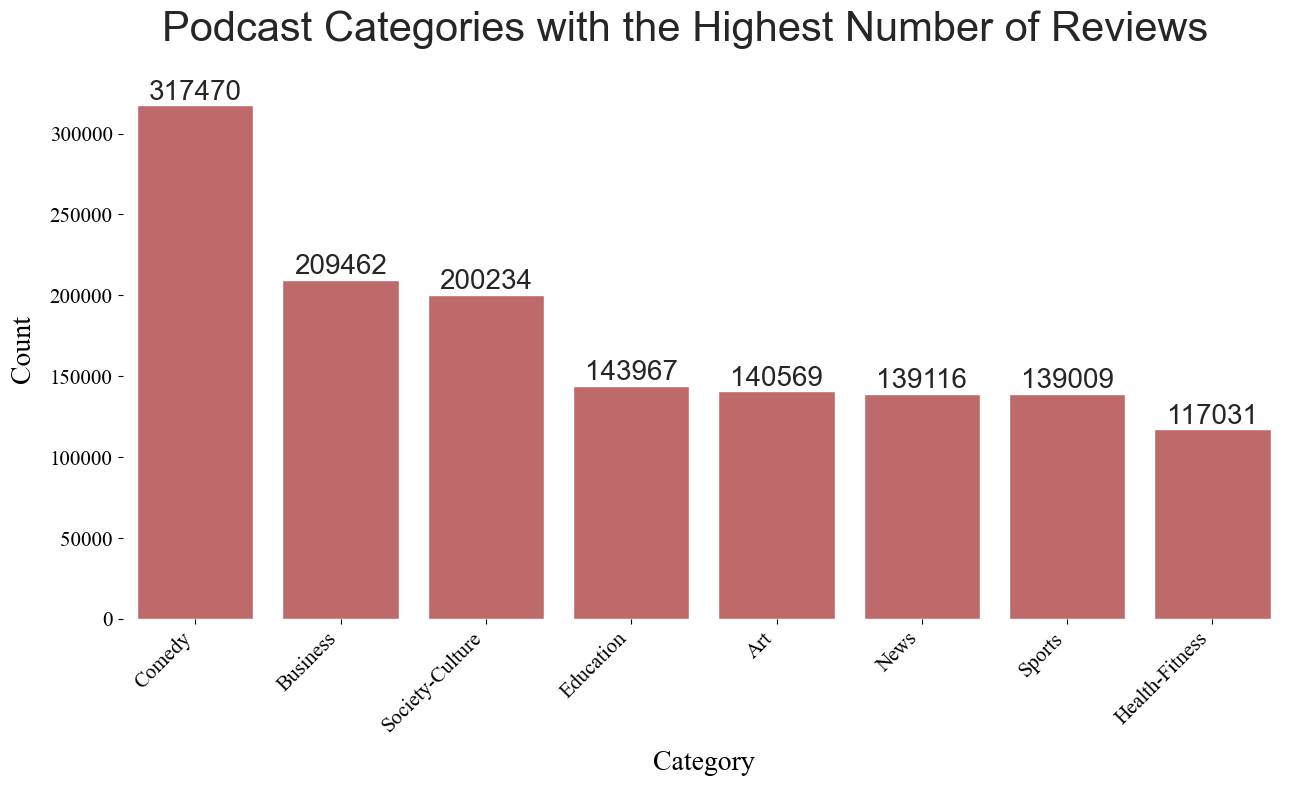

In [27]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Category",
    y="Count",
    data=podcasts_per_category[podcasts_per_category["Count"] > 100000],
    errorbar=None,
    palette=[color_7],
)

chart.bar_label(chart.containers[0], size=size)

plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.suptitle("Podcast Categories with the Highest Number of Reviews")

plt.show()

### Section Summary
> * The figure above shows the podcast categories with the highest number of reviews. 
> * The top 3 podcast categories are Comedy, Business and Society-Culture.

## Rating Mean and Median for Each Category

In [6]:
pd.options.display.float_format = "{:,.2f}".format
rating_stats = (
    podcastreviews.groupby("Category")["Rating"].agg([np.mean, np.median]).reset_index()
)
rating_stats = rating_stats.rename(columns={"mean": "Mean", "median": "Median"})
rating_stats = rating_stats.sort_values("Mean", ascending=False).reset_index(drop=True)

In [7]:
rating_stats.head()

Category  Mean  Median
0      Hinduism  4.92    5.00
1  Spirituality  4.90    5.00
2      Business  4.85    5.00
3         Islam  4.84    5.00
4  Christianity  4.82    5.00

In [8]:
rating_stats.tail()

Category  Mean  Median
20  Society-Culture  4.44    5.00
21          Science  4.42    5.00
22       Government  4.37    5.00
23             News  4.25    5.00
24       True-Crime  4.24    5.00

### Section Summary
> * The reviewers could give a star rating from 1 to 5. 
> * Most reviewers gave a star rating of 5, which affects the rating mean for all categories to hover between 4.2 and 4.9.
> * The median for all categories is 5.0.

## Total 5-Star and 1-Star Ratings for Each Category

In [7]:
total_rating = podcastreviews.pivot_table(
    index=["Category", "Rating"],
    aggfunc="size",
    fill_value=0,
)
total_rating = total_rating.to_frame().reset_index().rename(columns={0: "Count"})

In [10]:
star_rating_5 = total_rating.loc[(total_rating.Rating == 5)]
star_rating_5 = star_rating_5.sort_values("Count", ascending=False).reset_index(
    drop=True
)
star_rating_1 = total_rating.loc[(total_rating.Rating == 1)]
star_rating_1 = star_rating_1.sort_values("Count", ascending=False).reset_index(
    drop=True
)

In [11]:
rating_count = pd.merge(star_rating_5, star_rating_1, on="Category", how="inner")
rating_count = rating_count.rename(
    columns={
        "Rating_x": "Star",
        "Rating_y": "Star",
        "Count_x": "5-Star-Ratings",
        "Count_y": "1-Star-Ratings",
    }
)
rating_count = rating_count.head()

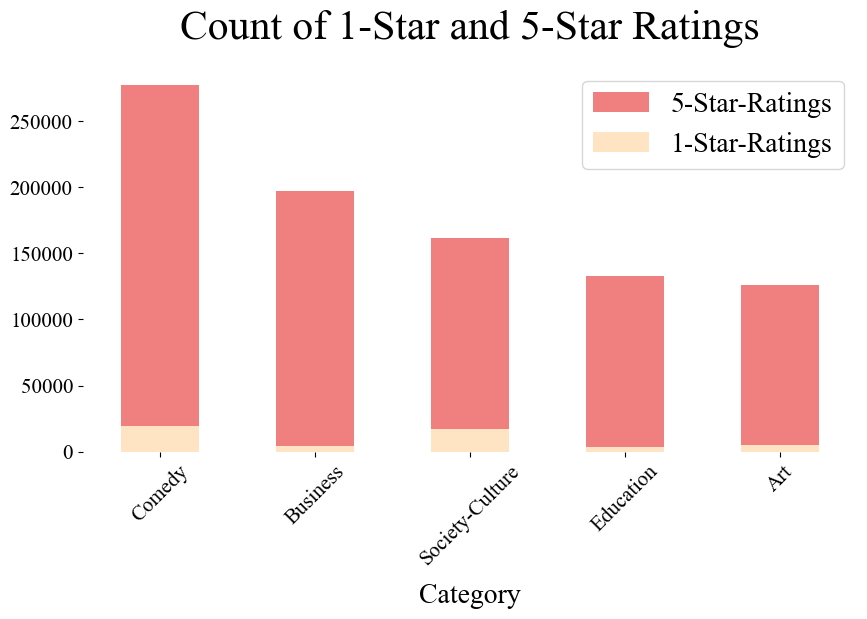

In [20]:
rcParams['figure.figsize'] = 10, 5

ax = rating_count.plot(x="Category", y="5-Star-Ratings", kind="bar", color=color_4)
rating_count.plot(x="Category", y="1-Star-Ratings", kind="bar", ax=ax, color=color_1)
plt.title('Count of 1-Star and 5-Star Ratings', font = "Times New Roman", size= size*1.5)
plt.xticks(rotation=45)

plt.show()

### Section Summary
> * There is a huge discrepency between the number of reviews that received a 5-star rating and those that received a 1-star rating. 

## Totals of Each Rating

In [12]:
rating_count_totals = podcastreviews.groupby("Rating").PodcastID.count()
rating_count_totals = rating_count_totals.to_frame()
rating_count_totals = rating_count_totals.rename(columns={"PodcastID": "Count"})
rating_count_totals = rating_count_totals.sort_values(
    "Count", ascending=False
).reset_index()

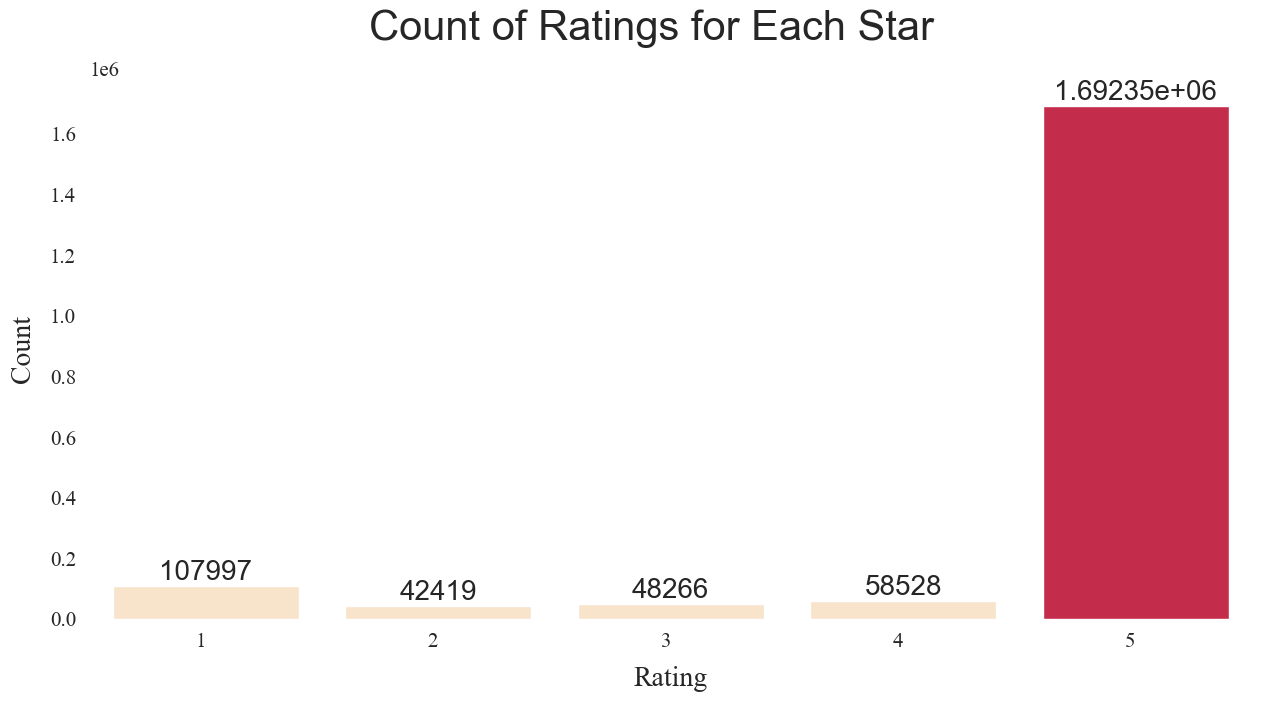

In [34]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Rating",
    y="Count",
    data=rating_count_totals,
    errorbar=None,
    palette=[color_1 if x != 2 else color_2
        for x in rating_count_totals["Rating"]],
)

chart.bar_label(chart.containers[0], size=size)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment="right")
plt.suptitle("Count of Ratings for Each Star")

plt.show()

### Section Summary
> * Nearly 1.6 million reviews were from listeners who gave the podcast a 5-star rating. This is compared to just 100,000 1-star rating and about 50,000 for each 2-star, 3-star and 4-star ratings.

## Count of Star Ratings

In [35]:
rating_count = podcastreviews.groupby("Rating").PodcastID.count()
rating_count = rating_count.to_frame()
rating_count = rating_count.rename(columns={"PodcastID": "Count"})
rating_count = rating_count.sort_values("Count", ascending=False).reset_index()
rating_count = rating_count.sort_values("Count", ascending=False)
rating_count["Rating"] = rating_count["Rating"].replace(2, 1)
rating_count["Rating"] = rating_count["Rating"].replace(4, 5)
rating_count = rating_count.groupby("Rating")["Count"].sum()
rating_count = rating_count.to_frame()
rating_count = rating_count.reset_index()

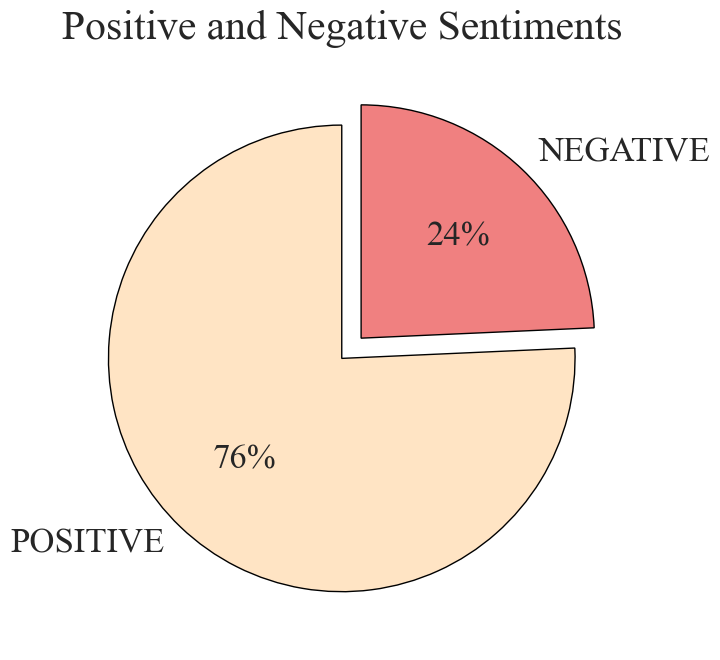

In [36]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(20, 7))

data = [rating_count.Count[0], rating_count.Count[1]]
labels = ["POSITIVE", "NEGATIVE"]
colors = [color_1, color_4]

axes.set_title("Positive and Negative Sentiments")
axes.pie(
    data,
    labels=labels,
    colors=colors,
    startangle=90,
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": size + 5},
    explode=[0, 0.12],
)


plt.tight_layout()

plt.show()

### Section Summary
> * For this figure, I counted star ratings 4 and 5 as positive. I counted star ratings 1 and 2 as negative.
> * I did not include the reviews with 3-star ratings.
> * By far, the majority of reviews (76%) were written by those who gave a rating of 4 or 5. 
> * Only 24% gave a rating of 1 or 2. 

# Hypothesis Tests

In addition to my general analysis, I tested the following hypotheses.

## Hypothesis 1

**Null**: There is no significant difference between the mean review length of 5-star reviews and the mean review length of all reviews. <BR>
**Alternative**: The mean review length of a 5-star review is significantly different than the mean review length of all other star-rated reviews.

## Two-Tailed Z-Test

In [3]:
def two_tailed_z_test(sample_mean, sample_size, pop_mean, pop_std, critical_value):

    result = (sample_mean - pop_mean) / (pop_std / math.sqrt(sample_size))
    if result < critical_value:
        print("Failed to reject the null hypothesis.")
    else:
        print("Null hypothesis is rejected.")

In [4]:
positive = podcastreviews[podcastreviews["Rating"] == 5]

In [5]:
l = [5]

two_tailed_z_test(
    np.average(positive["Text_Length"]),
    positive.shape[0],
    podcastreviews["Text_Length"].agg([np.mean]).item(),
    podcastreviews[~podcastreviews.Rating.isin(l)]["Text_Length"].agg([np.std]).item(),
    1.960,
)

Failed to reject the null hypothesis.


## Hypothesis 2

**Null**: The mean star rating of the Comedy category is significantly different than the mean star rating of the Business category. <BR>
**Alternative**: There is no significant difference between the mean star rating of the Comedy category and the mean star rating of the Business category.

## Two-Sample T-Test

In [12]:
def two_sample_t_test(sample1, sample2, variance):

    if variance is False:
        print("The variance of the samples are different.")
    else:
        print("The variance of the samples are the same.")

    result = stats.ttest_ind(sample1, sample2, equal_var=variance)

    if result.pvalue < 0.05:
        print("Null hypothesis is rejected.")
    else:
        print("Failed to reject the null hypothesis.")

In [13]:
comedy = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\PodcastReviews\\DataSets\\Comedy.csv",
    index_col=0,
)

In [14]:
business = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\PodcastReviews\\DataSets\\Business.csv",
    index_col=0,
)

In [26]:
comedy_sample = comedy.sample(n=100000, replace=True)
business_sample = business.sample(n=100000, replace=True)

In [27]:
var_comedy_sample = np.var(comedy_sample["Rating"])
var_business_sample = np.var(business_sample["Rating"])

if var_comedy_sample == var_business_sample:
    variance = True
else:
    variance = False

In [28]:
two_sample_t_test(comedy_sample["Rating"], business_sample["Rating"], variance)

The variance of the samples are different.
Null hypothesis is rejected.


### Section Summary
> * I conducted a z-test to determine if there is a significant difference between the mean review length of a 5-star review and the mean review length of all reviews. The test determined with a 95% confidence level that there is not a significant difference between the text length of a 5-star rated review and all reviews. 
> * I conducted a t-test to determine if there is a significant difference between the mean star rating of the Comedy category and the business category. These are the top 2 categories in the dataset with the most number of reviews. This test determined with a 95% confidence level that there is a significant difference between the mean star rating of the Comedy category and the mean star rating of the Business category.

# N-Grams

This is the sentiment analysis part of this report. I used machine learning and logistic regression to give a picture of the positive and negative sentiments. I used word cloud to present the sentiments in visual format. I used unigrams, bigrams and trigrams, mostly because each produced a different type of visual word cloud that I thought would be useful. 

## Functions

### Model Training

In [46]:
def train_model(dataset, n):

    index = dataset.index
    dataset["random_number"] = np.random.randn(len(index))
    train = dataset[dataset["random_number"] <= 0.8]
    test = dataset[dataset["random_number"] > 0.8]
    vectorizer = CountVectorizer(ngram_range=(n, n), token_pattern=r"\b\w+\b")
    train_matrix = vectorizer.fit_transform(train["Content"])
    test_matrix = vectorizer.transform(test["Content"])
    X_train = train_matrix
    X_test = test_matrix
    y_train = train["Sentiment"]
    y_test = test["Sentiment"]

    return X_test, y_test, X_train, y_train, vectorizer

### Tokenization

In [49]:
def tokenizer(content):

    coun_vect = CountVectorizer(stop_words="english")
    count_matrix = coun_vect.fit_transform(content)
    Content_count = coun_vect.vocabulary_
    Content_sorted = sorted(Content_count.items(), key=lambda x: x[1], reverse=True)
    tokenized_words = pd.DataFrame(Content_sorted)
    tokenized_words = tokenized_words.rename(columns={0: "Tokenized", 1: "Count"})

    return tokenized_words

### Lemmatization

In [50]:
def lemmatizer(tokenized_words):

    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    tokenized_words["Parsed"] = tokenized_words["Tokenized"].apply(
        lambda x: [y.lemma_ for y in nlp(x)]
    )
    tokenized_words["Lemmatized"] = [
        ",".join(map(str, l)) for l in tokenized_words["Parsed"]
    ]
    tokenized_words = tokenized_words.drop(["Tokenized", "Parsed"], axis=1)
    lemmatized_words = tokenized_words.groupby("Lemmatized")["Count"].sum().to_frame()
    lemmatized_words = lemmatized_words.reset_index()

    return lemmatized_words

### N-Gram Creation

In [47]:
def ngram_creation(X_train, y_train, vectorizer):

    log_model = LogisticRegression(solver="lbfgs", max_iter=1000)
    log_model.fit(X_train, y_train)
    df = pd.DataFrame()
    df["NGram"] = vectorizer.get_feature_names_out()
    df["Coef"] = log_model.coef_[0]
    df = df.reset_index(drop=True)
    df.index.name = "Count"
    df = df.rename_axis("Count").reset_index()
    df.index = pd.RangeIndex(start=0, stop=len(df), step=1)
    df.index.name = "Index"
    df = df[["NGram", "Count", "Coef"]]
    df = df.sort_values("Coef", ascending=False)

    return log_model, df

### Word Cloud Creation

In [25]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

## All Podcast Categories

In [51]:
podcastreviews_tokenized = tokenizer(podcastreviews["Content"])
podcastreviews_lemmantized = lemmatizer(podcastreviews_tokenized)

In [52]:
X_test, y_test, X_train, y_train, vectorizer = train_model(podcastreviews, 1)
log_model, podcastreviews_unigrams = ngram_creation(X_train, y_train, vectorizer)

### Positive Unigrams

In [53]:
podcastreviews_positive_unigrams = podcastreviews_unigrams.head(10)
podcastreviews_positive_unigrams

NGram   Count  Coef
Index                            
407148   syncopated  407148 3.204
363500       sargon  363500 2.734
32078         bantu   32078 2.702
346945   refreshing  346945 2.675
163982     gittings  163982 2.639
318388   pleasantly  318388 2.559
112600  downtoearth  112600 2.558
461683     withhold  461683 2.373
337494        qualm  337494 2.338
407004       symbol  407004 2.323

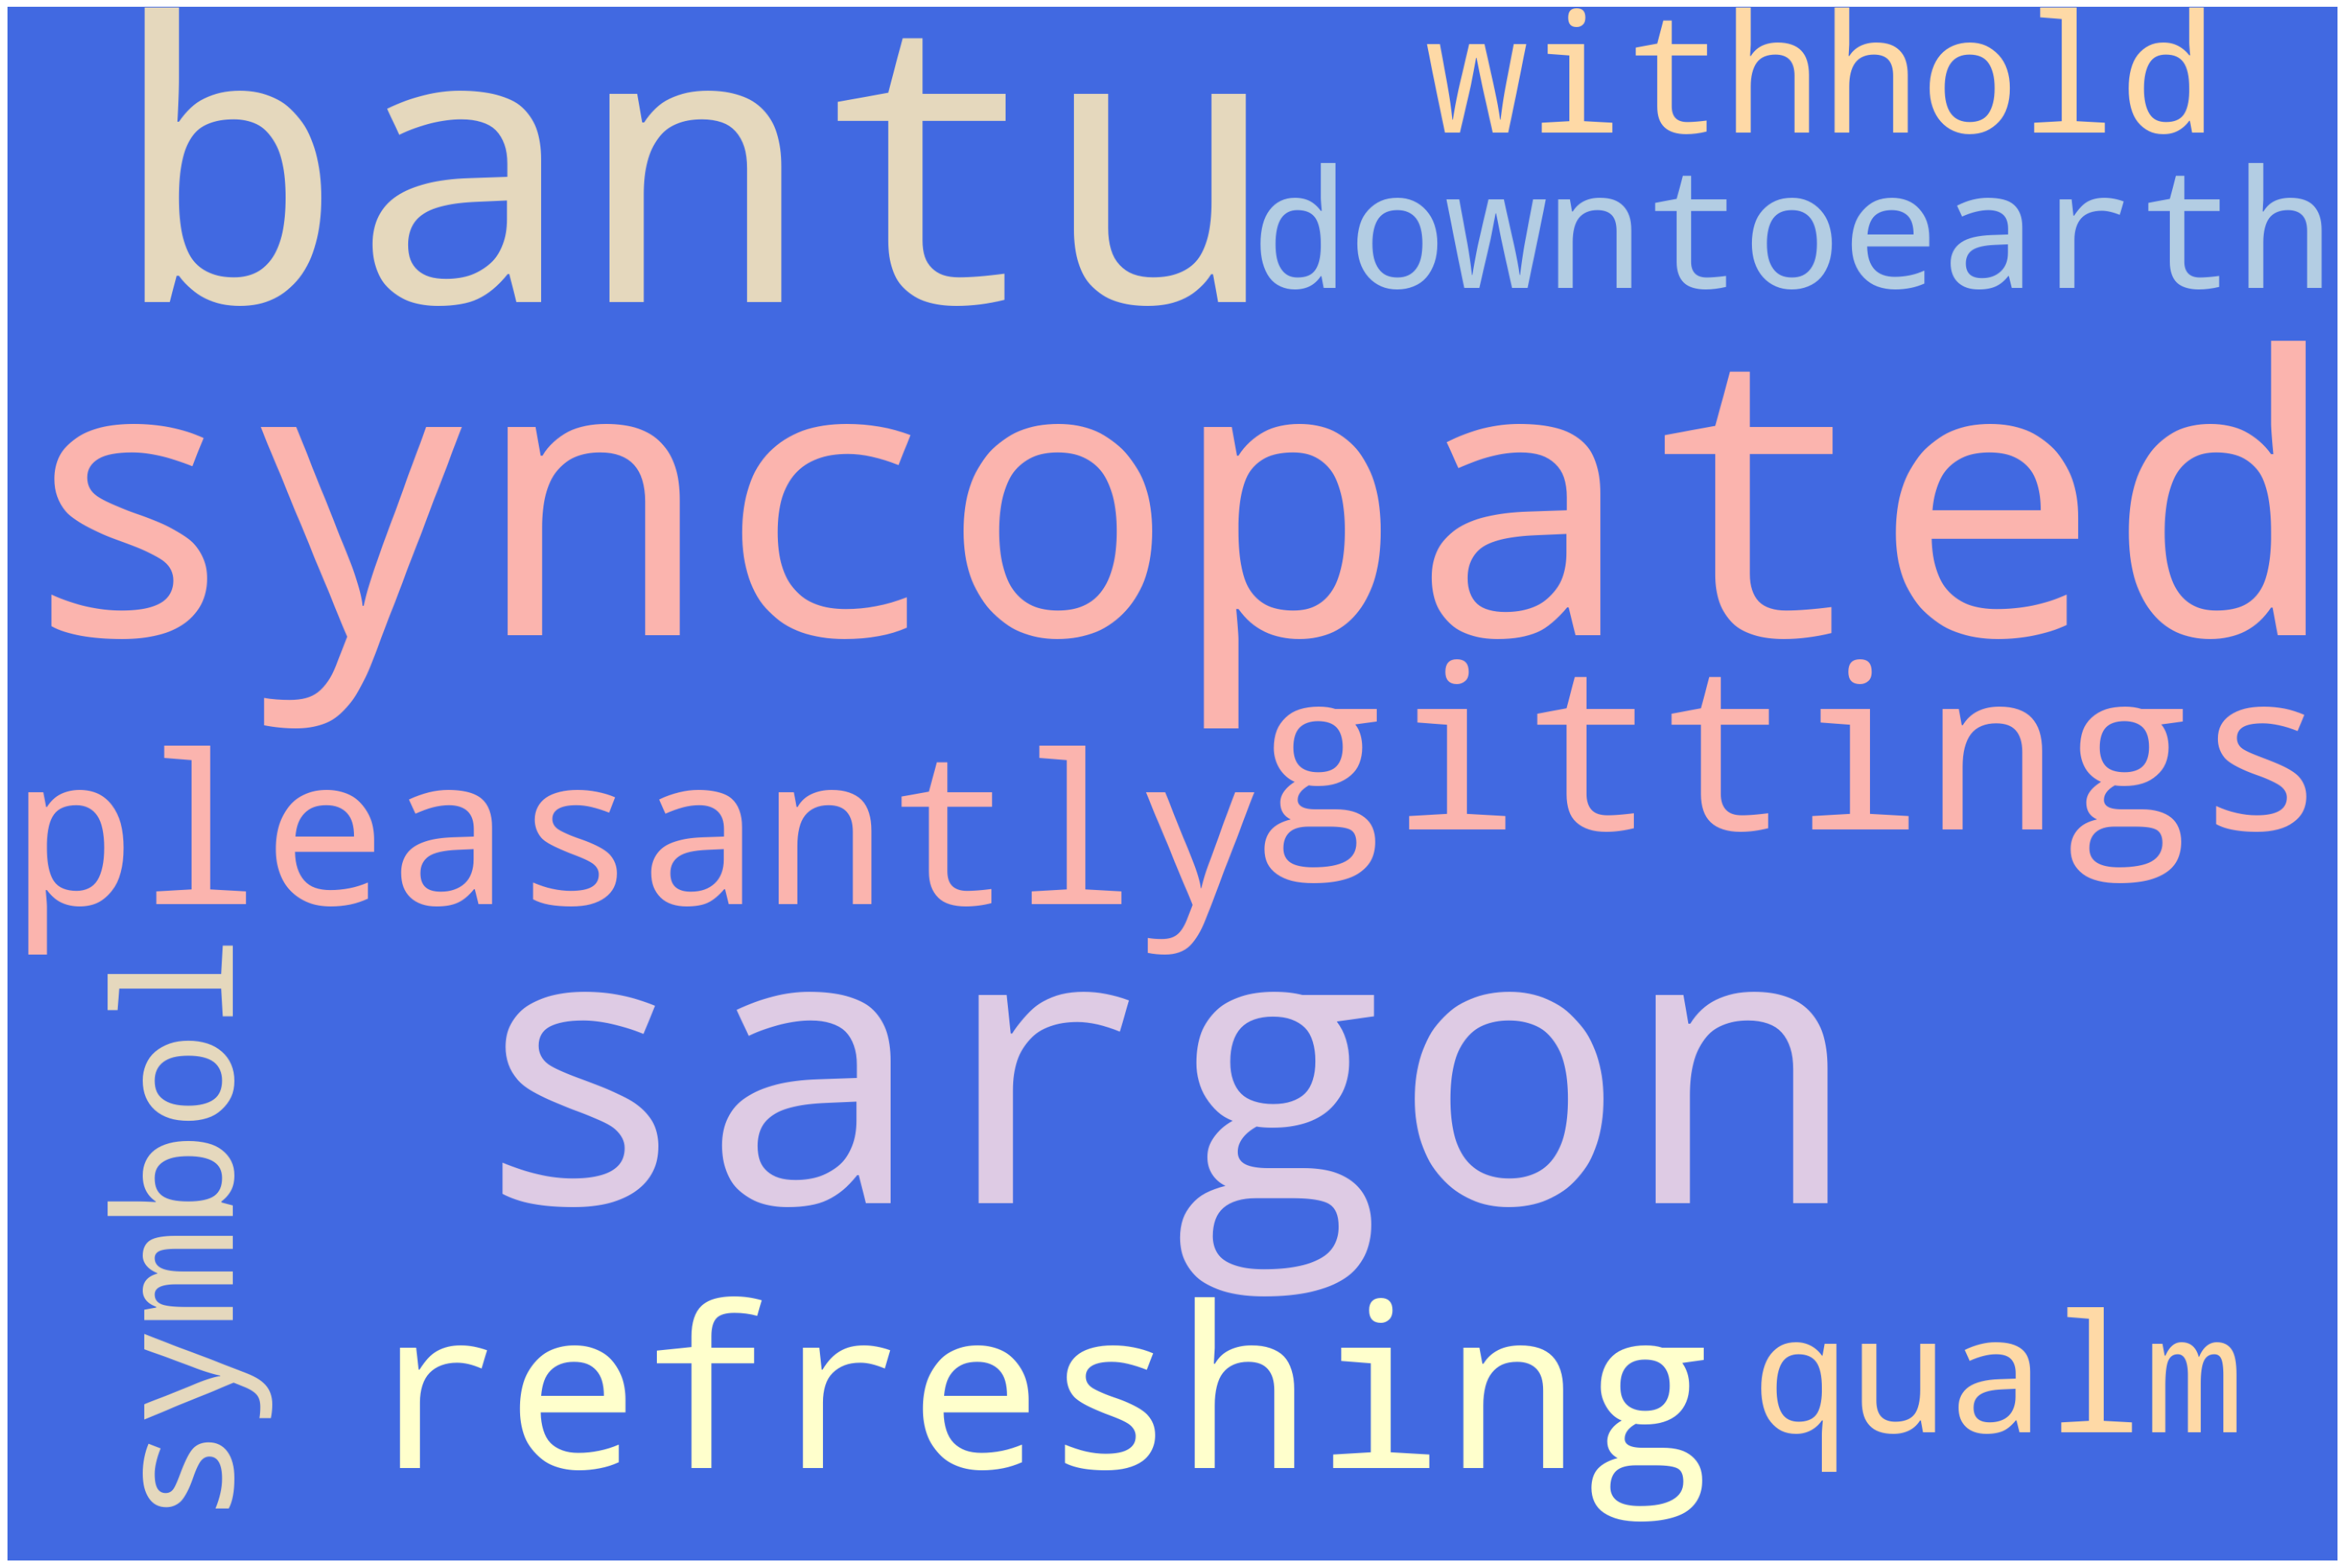

In [55]:
text = " ".join(review for review in podcastreviews_positive_unigrams.NGram)

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color=color_5,
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text)

plot_cloud(wordcloud)

### Negative Unigrams

In [56]:
podcastreviews_negative_unigrams = podcastreviews_unigrams.tail(10)
podcastreviews_negative_unigrams

NGram   Count   Coef
Index                               
102488       devolved  102488 -2.681
382082          skell  382082 -2.709
98544        degraded   98544 -2.712
441034    unsubscribe  441034 -2.839
112322       downhill  112322 -2.840
317229     plagiarism  317229 -2.899
272599    morepisodes  272599 -2.934
439214    unfollowing  439214 -3.077
441077  unsubscribing  441077 -3.432
441039   unsubscribed  441039 -3.641

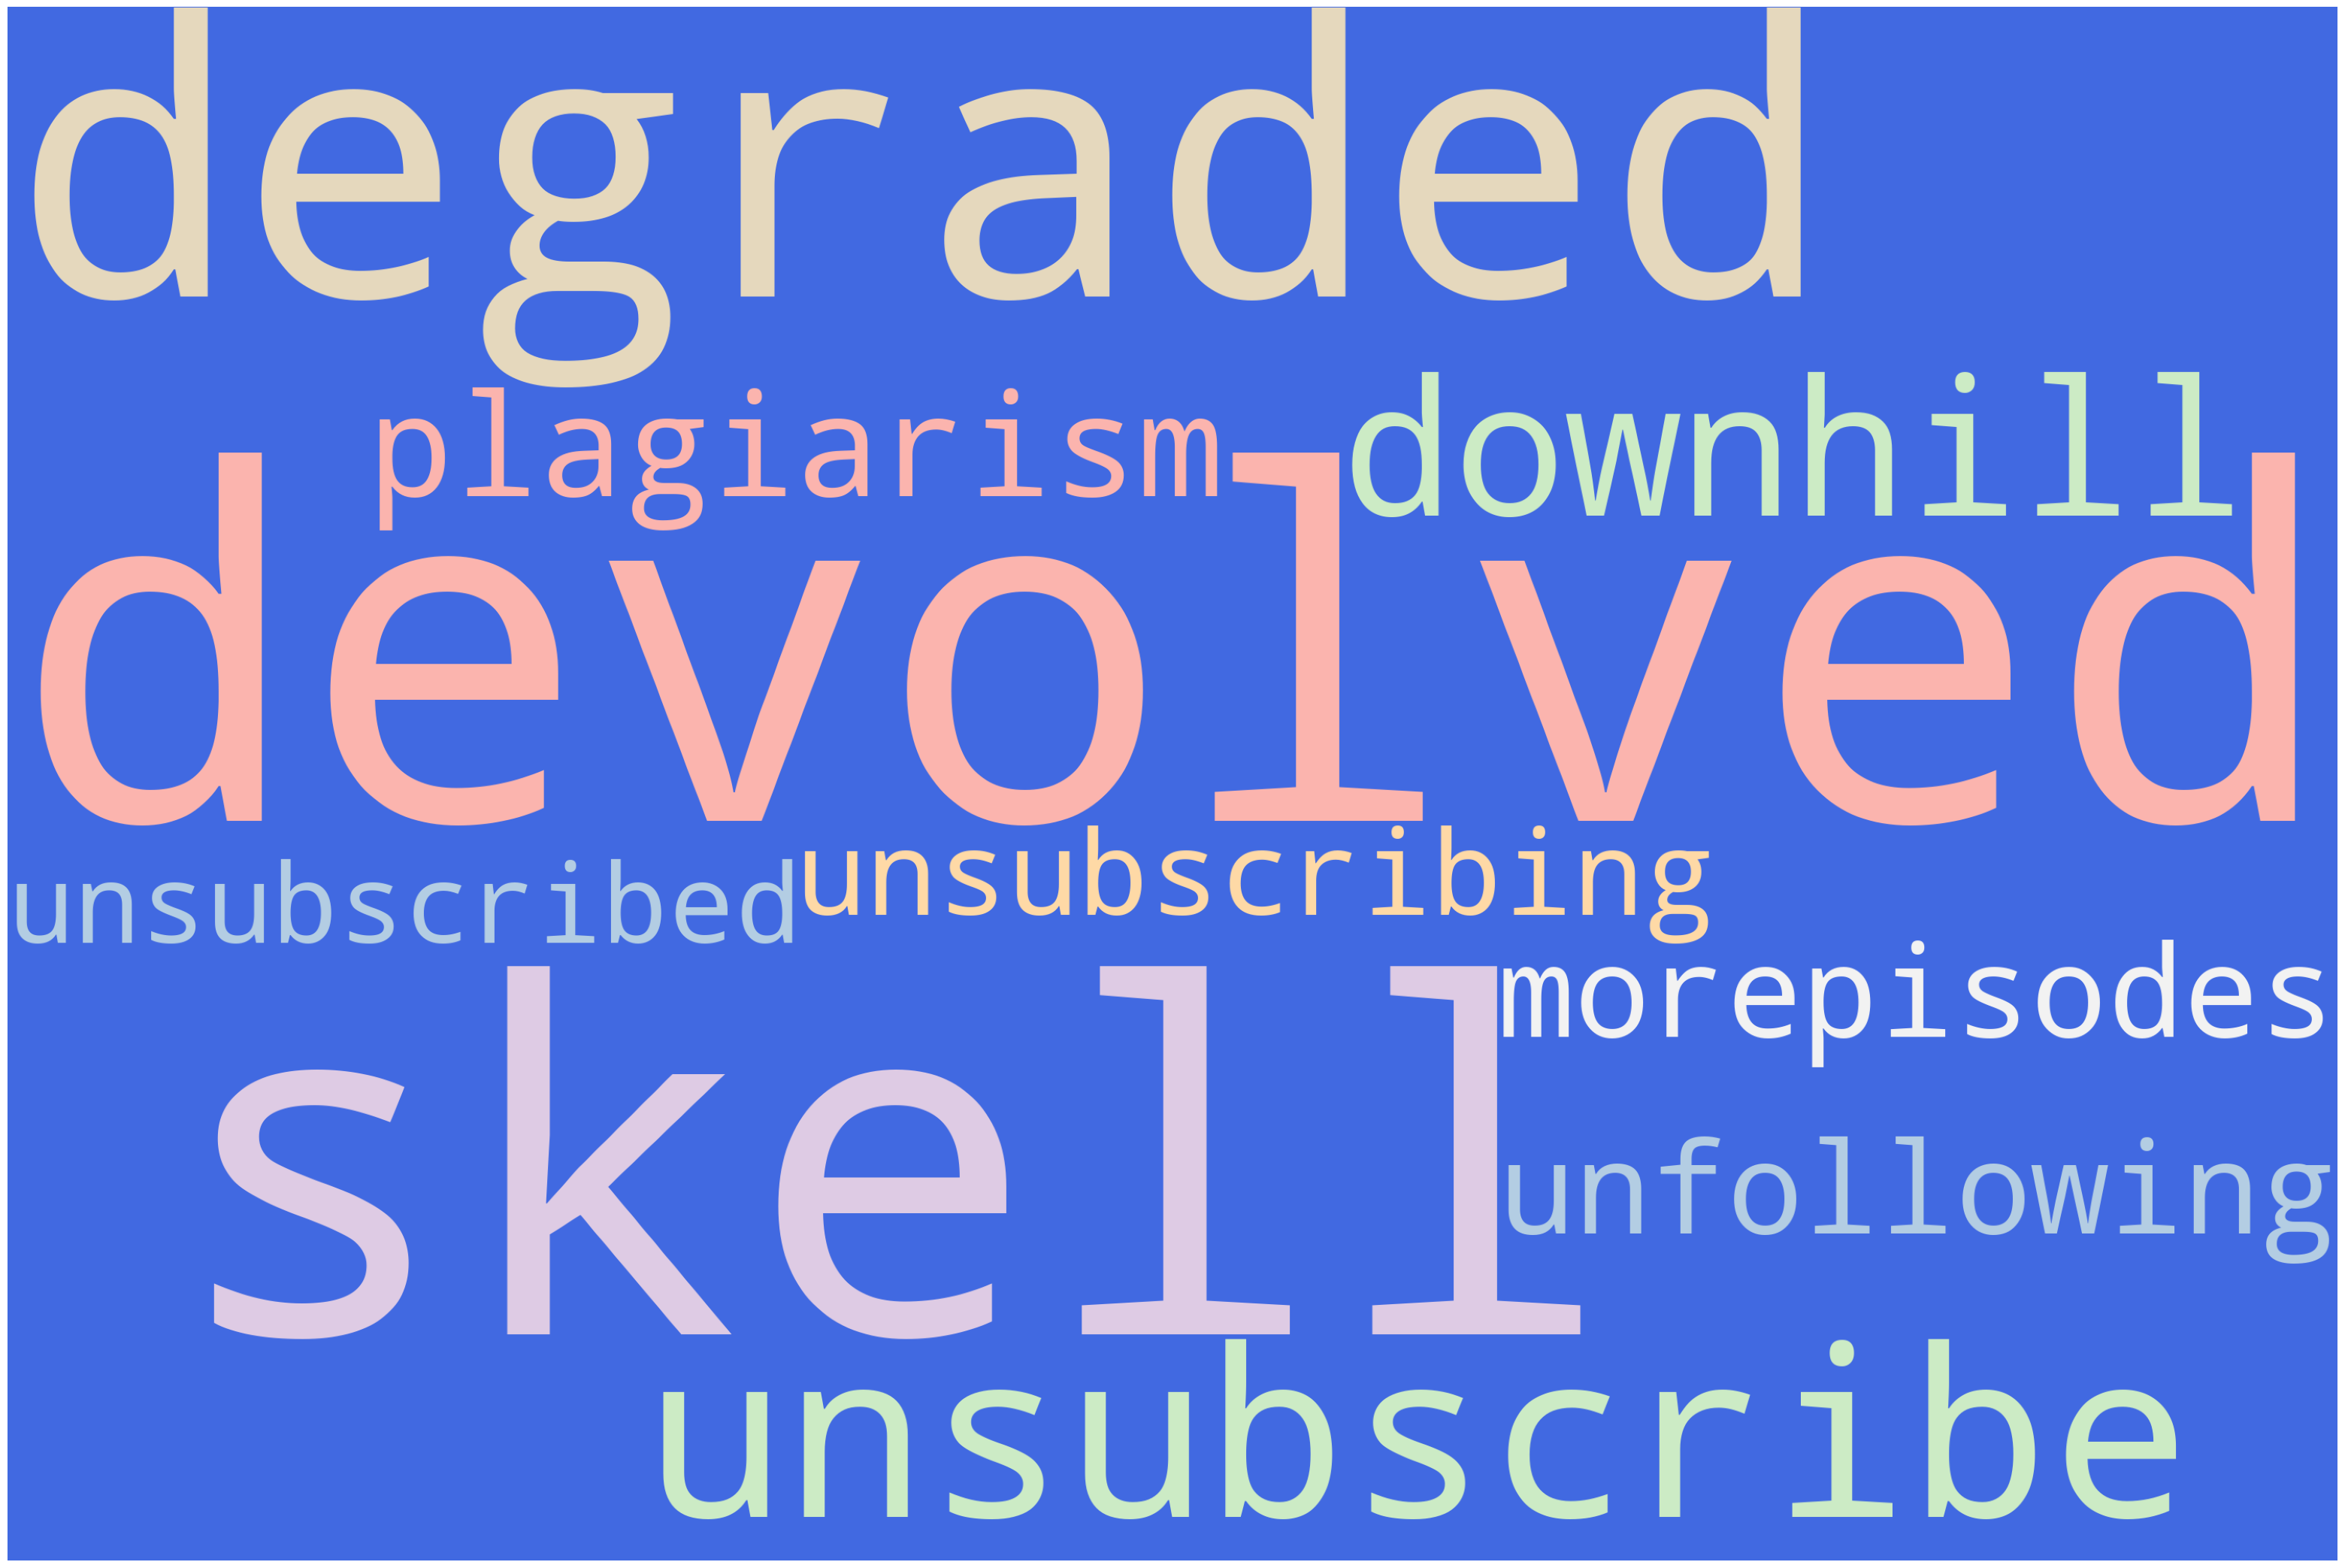

In [57]:
text = " ".join(review for review in podcastreviews_negative_unigrams.NGram)

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color=color_5,
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text)

plot_cloud(wordcloud)

## Comedy Category

In [26]:
comedy = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\PodcastReviews\\DataSets\\Comedy.csv",
    index_col=0,
)

In [28]:
X_test, y_test, X_train, y_train, vectorizer = train_model(comedy, 1)
log_model, comedy_unigrams = ngram_creation(X_train, y_train, vectorizer)

### Positive Unigrams

In [29]:
comedy_positive_unigrams = comedy_unigrams.head(10)
comedy_positive_unigrams

NGram   Count  Coef
Index                             
28379     delightful   28379 2.593
97268     refreshing   97268 2.230
23534       convince   23534 2.053
58520   instructions   58520 2.053
51510         haters   51510 1.963
97132          reese   97132 1.952
33795     earthquake   33795 1.908
58011     injustices   58011 1.902
110899        spring  110899 1.892
54364         hooked   54364 1.868

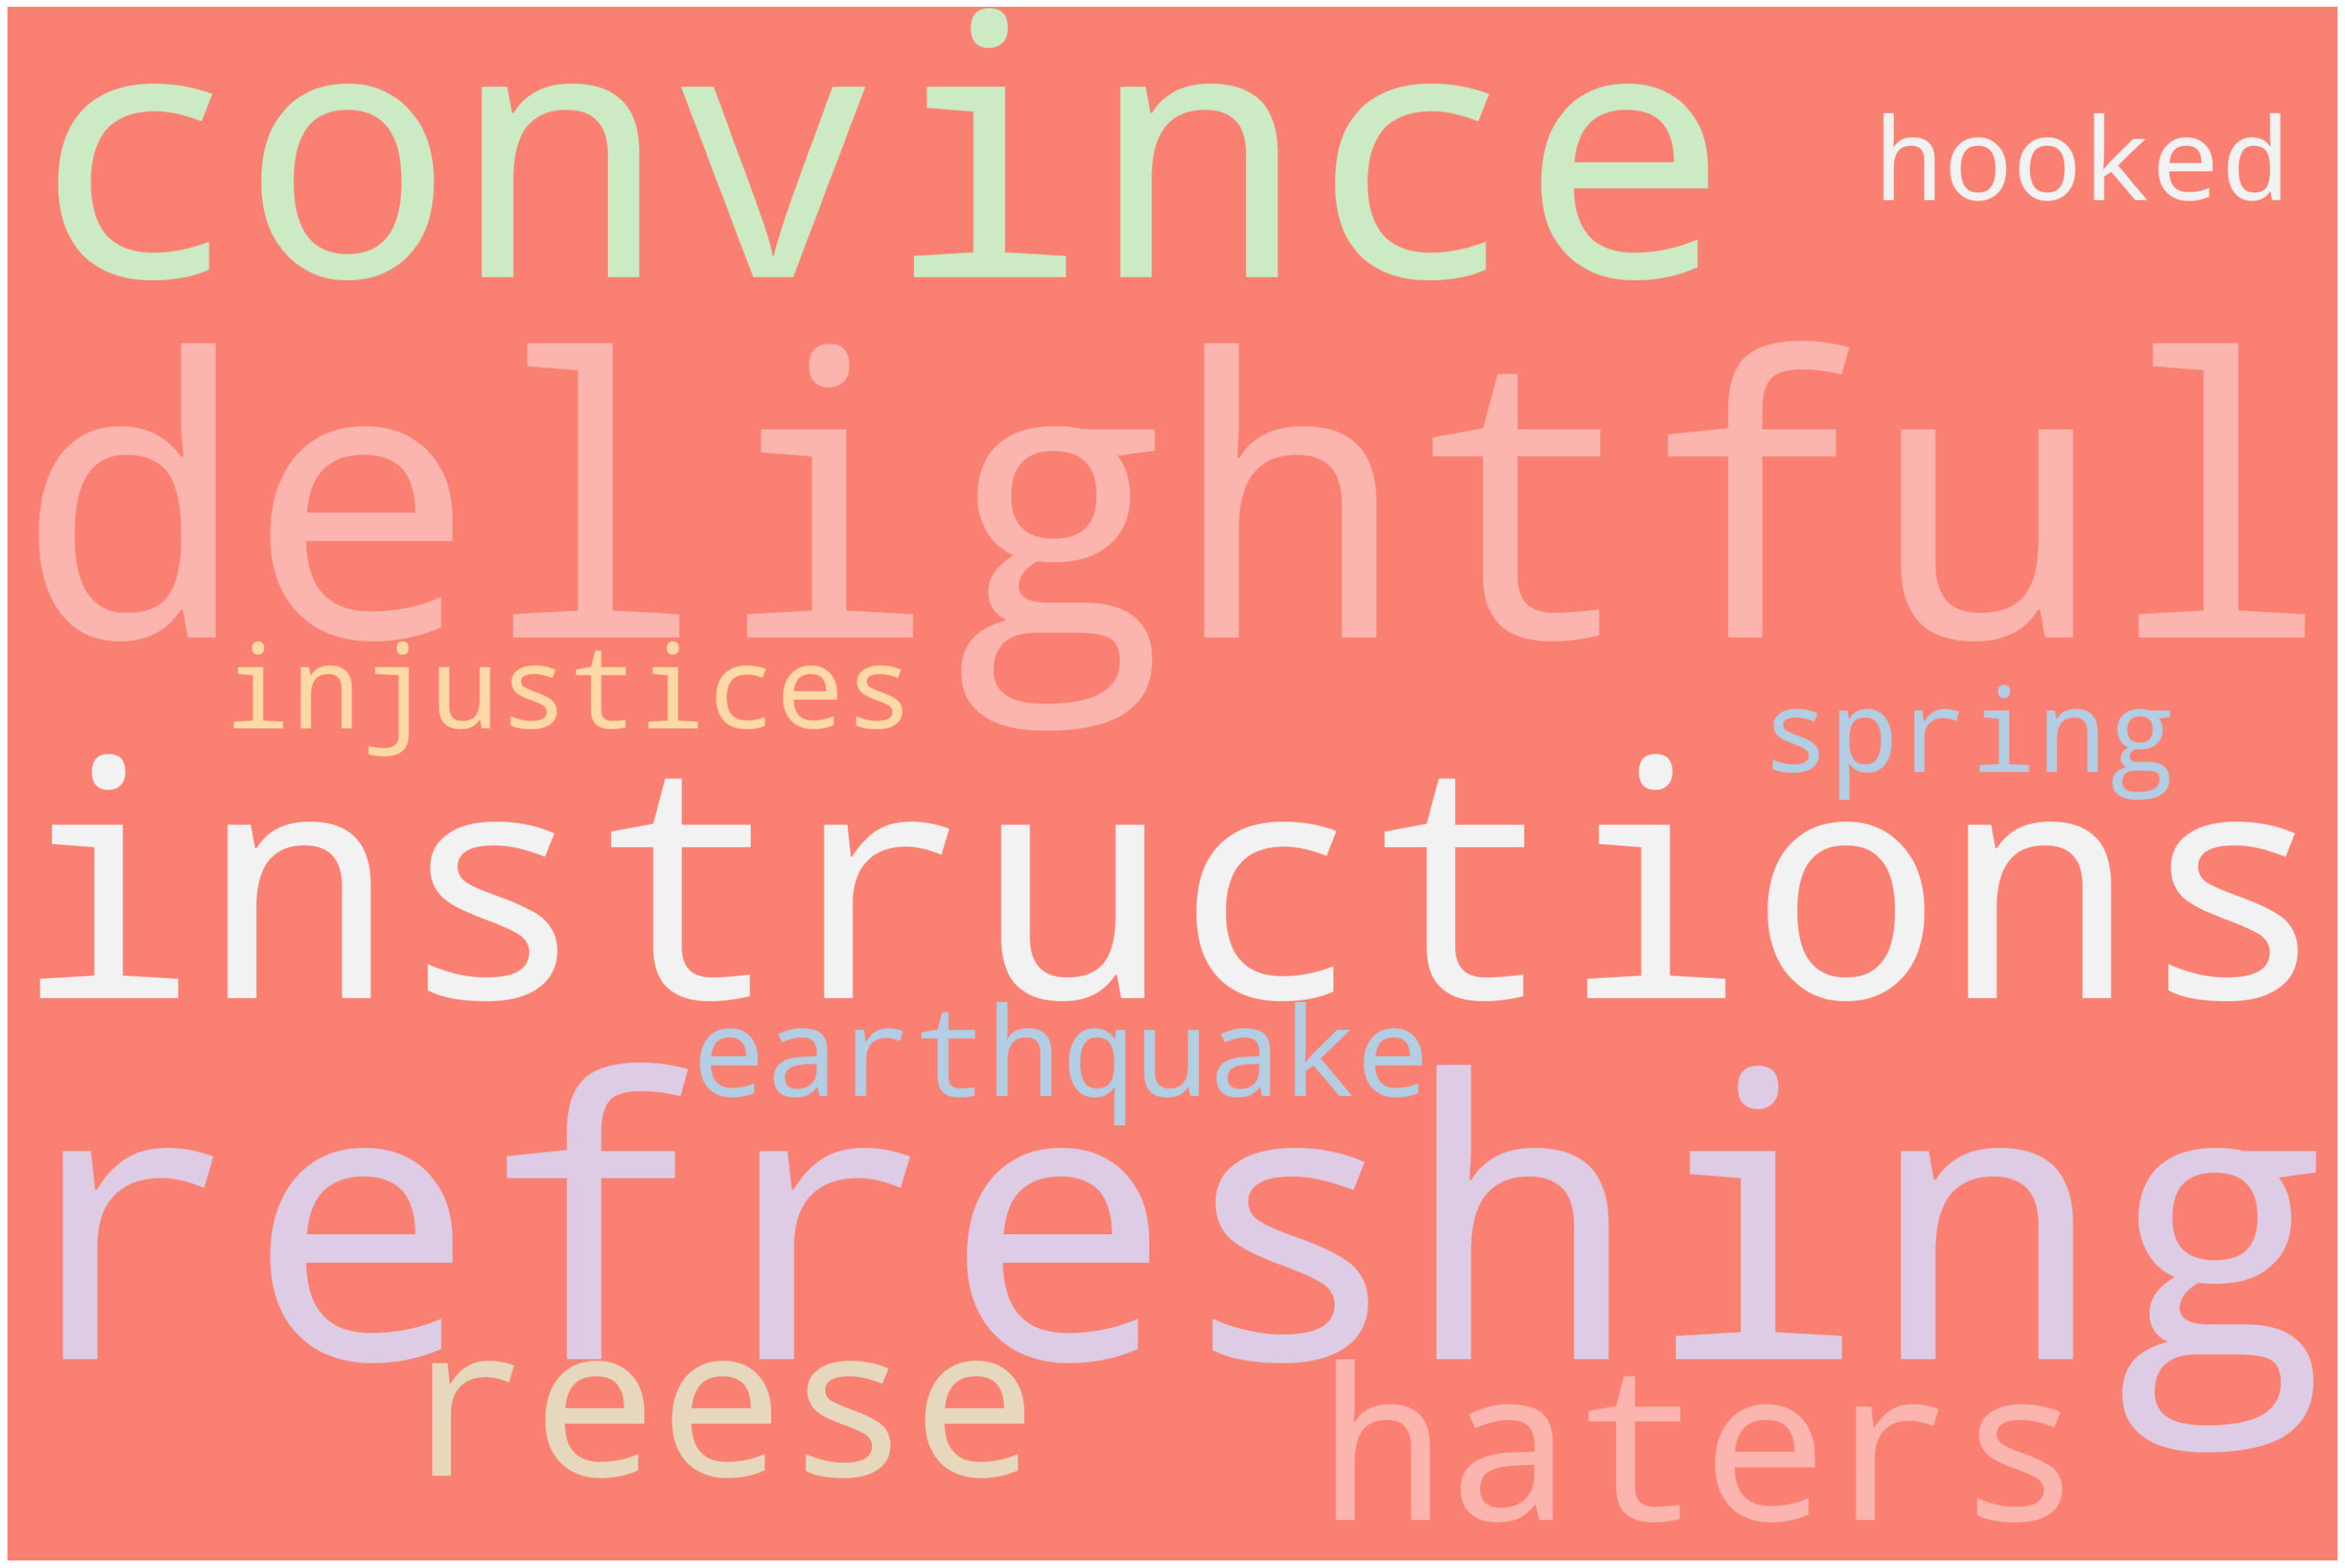

In [39]:
text = " ".join(review for review in comedy_positive_unigrams.NGram)

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color=color_9,
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text)

plot_cloud(wordcloud)

### Negative Unigrams

In [30]:
comedy_negative_unigrams = comedy_unigrams.tail(10)
comedy_negative_unigrams

NGram   Count   Coef
Index                               
124419     unoriginal  124419 -2.376
57063    inaccuracies   57063 -2.538
124633    unsubscribe  124633 -2.548
65275           lacks   65275 -2.625
123527     unbearable  123527 -2.635
124322   unlistenable  124322 -2.647
123942     uneducated  123942 -2.674
127853          waste  127853 -2.902
124640  unsubscribing  124640 -3.062
124634   unsubscribed  124634 -3.248

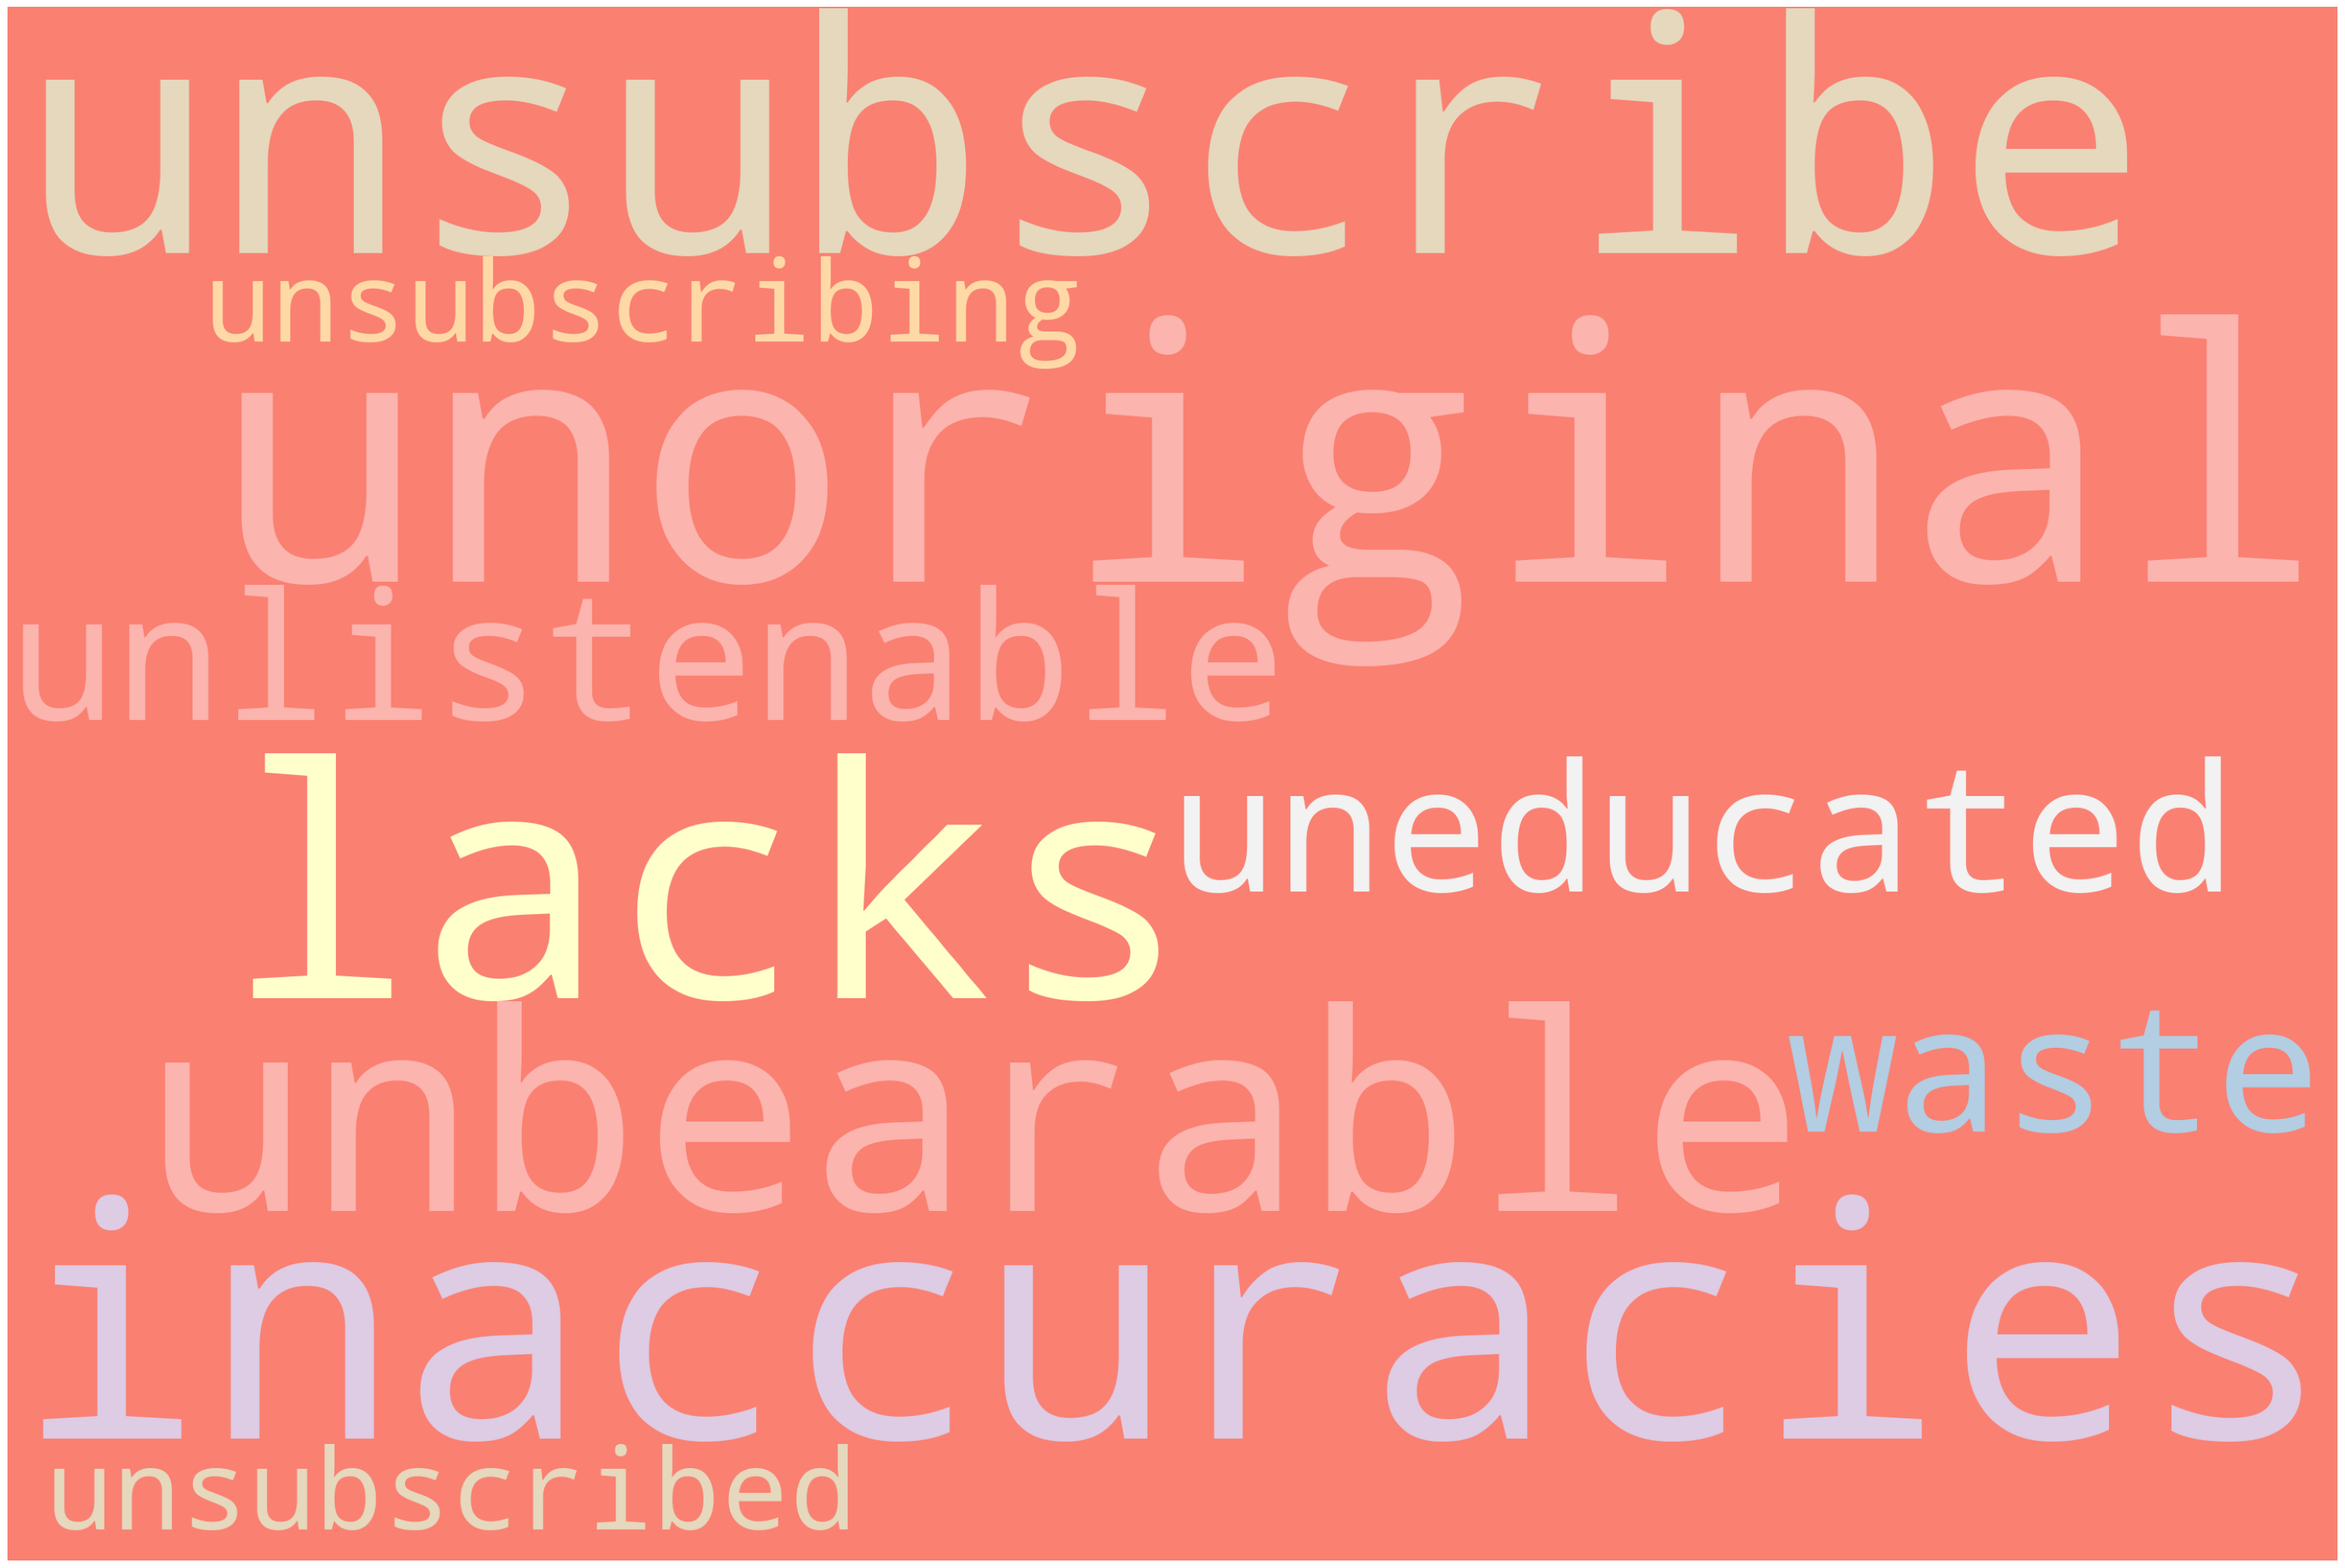

In [40]:
text = " ".join(review for review in comedy_negative_unigrams.NGram)

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color=color_9,
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text)

plot_cloud(wordcloud)

## Business Category

In [10]:
business = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\PodcastReviews\\DataSets\\Business.csv",
    index_col=0,
)

In [11]:
X_test, y_test, X_train, y_train, vectorizer = train_model(business, 2)
log_model, business_bigrams = ngram_creation(X_train, y_train, vectorizer)

### Positive Bigrams

In [12]:
business_positive_bigrams = business_bigrams.head(10)
business_positive_bigrams

NGram    Count  Coef
Index                                     
154024            cant wait   154024 2.401
720631      looking forward   720631 2.150
525762     highly recommend   525762 1.873
478222    great information   478222 1.822
479970           great work   479970 1.813
478362            great job   478362 1.801
525767   highly recommended   525767 1.712
1174123          thank much  1174123 1.689
309220          easy listen   309220 1.627
973342            real deal   973342 1.574

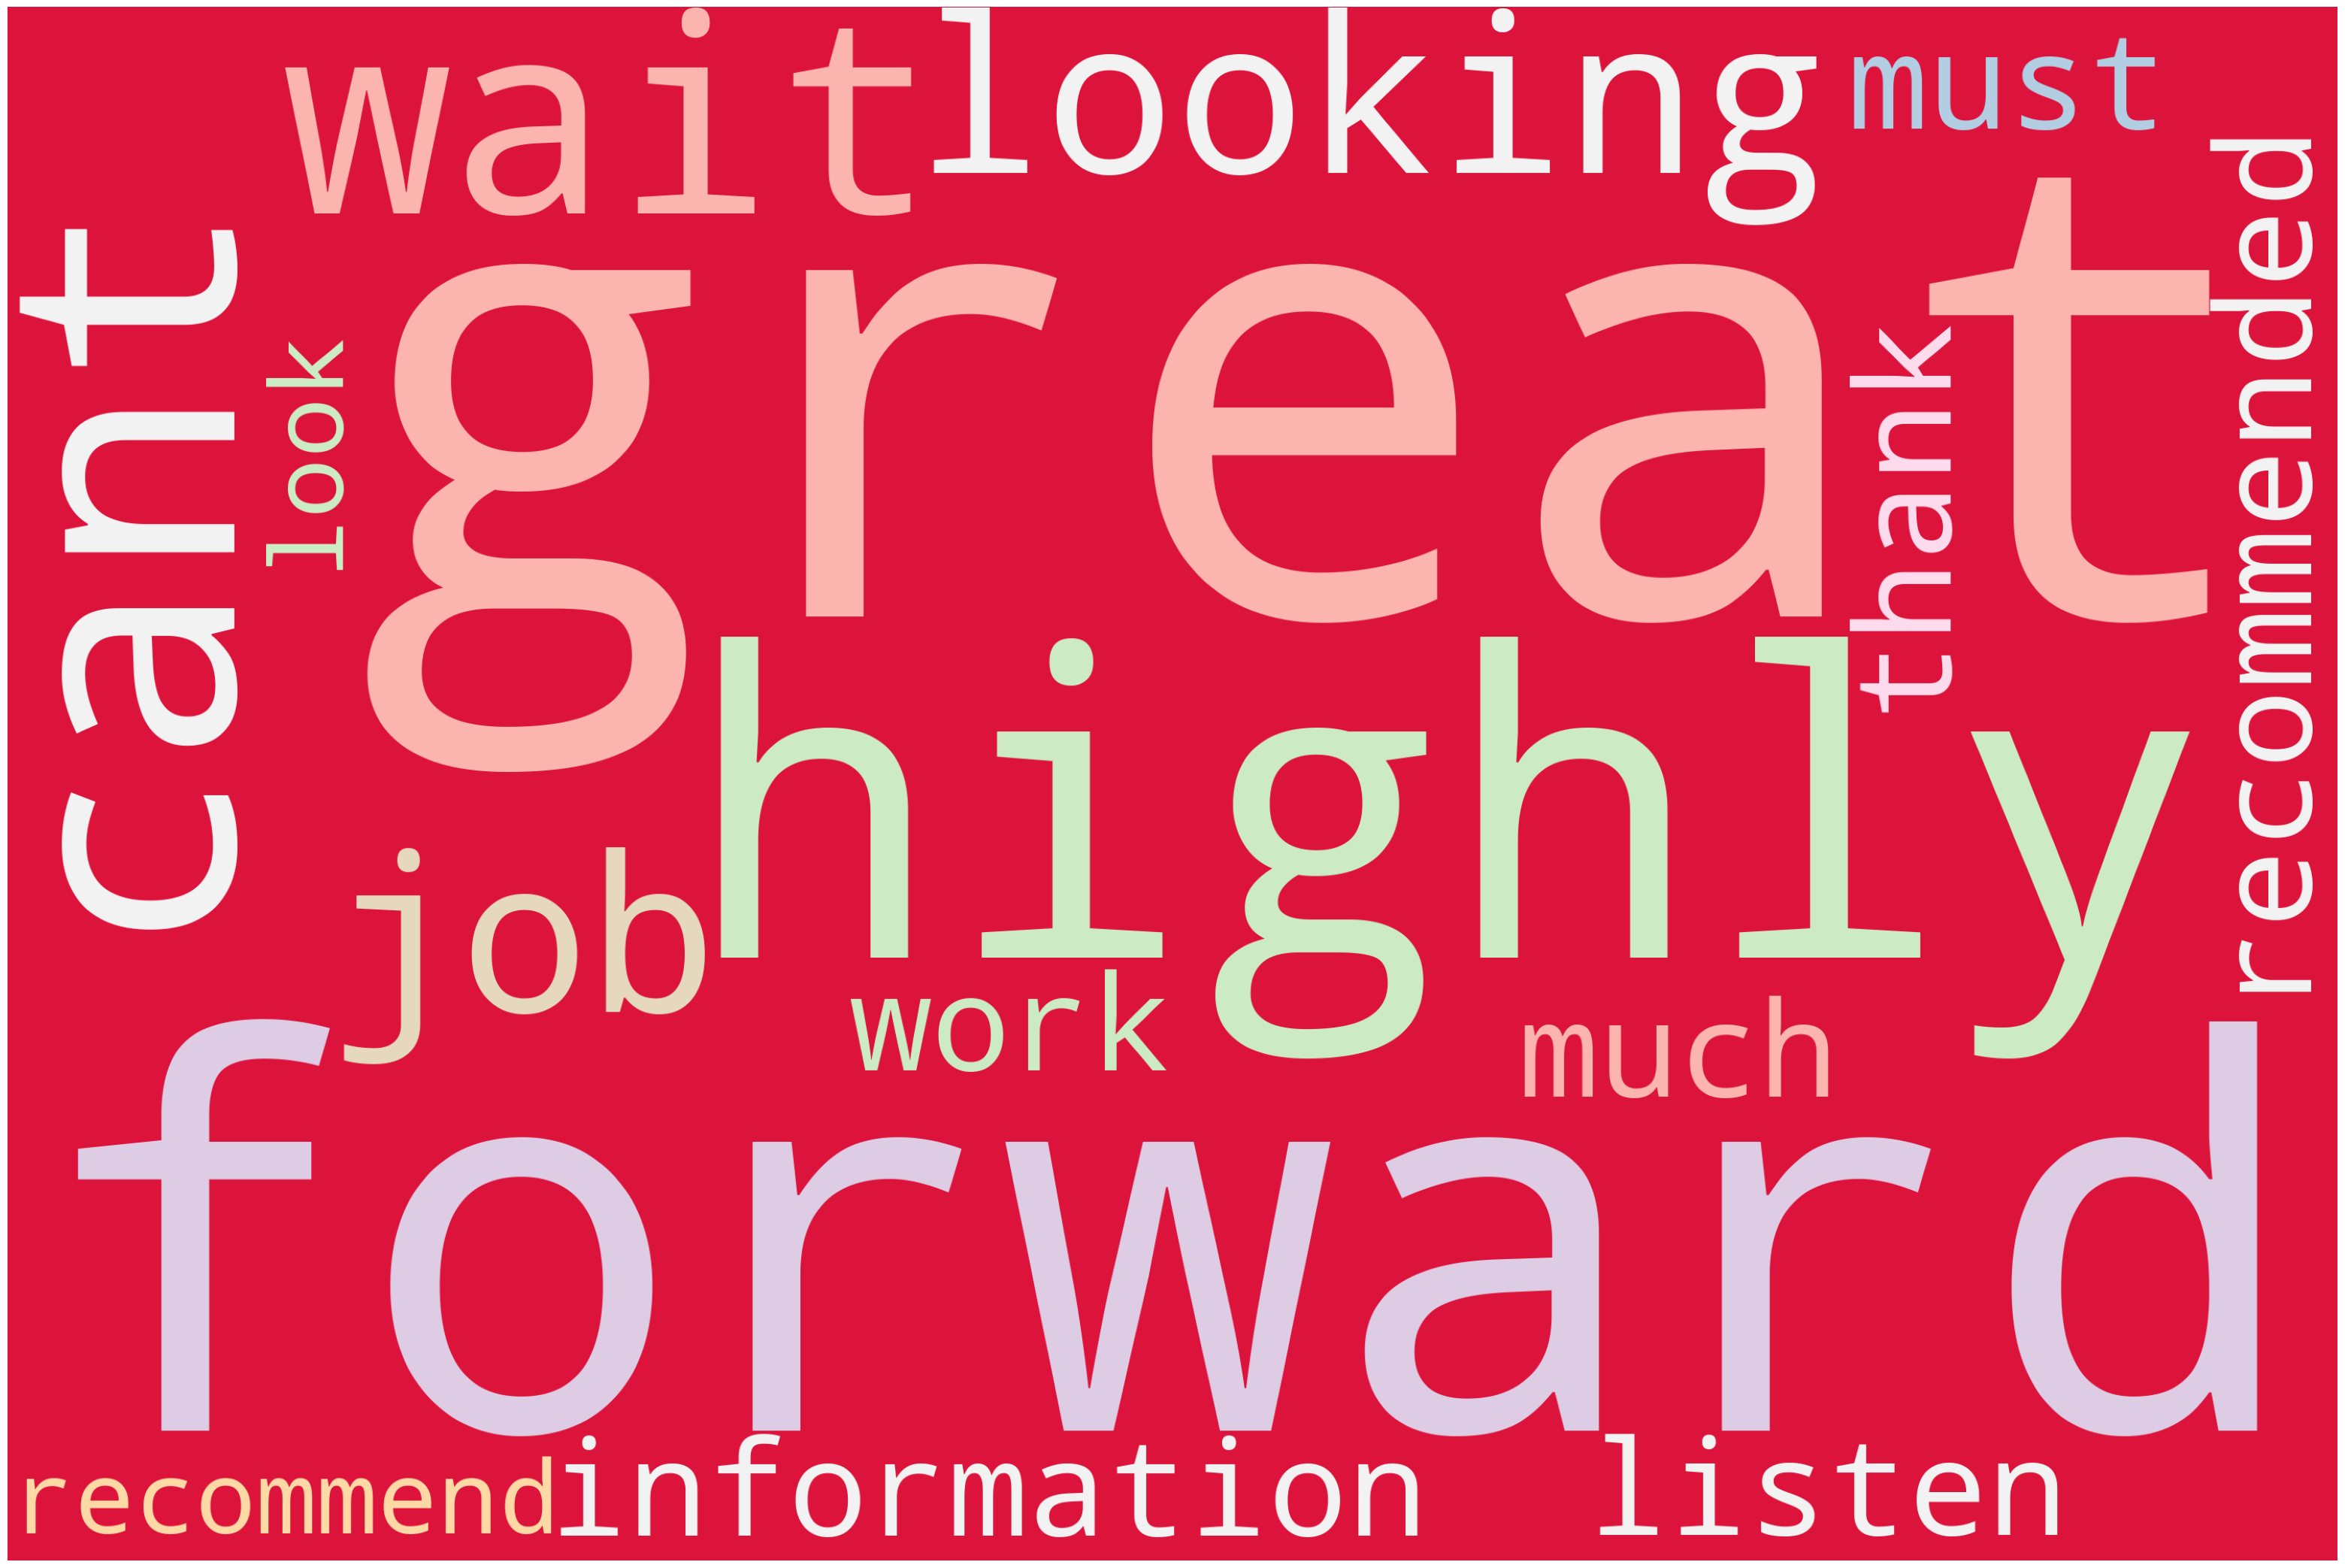

In [54]:
text = " ".join(review for review in business_positive_bigrams.NGram)

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color=color_2,
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text)

plot_cloud(wordcloud)

### Negative Bigrams

In [13]:
business_negative_bigrams = business_bigrams.tail(10)
business_negative_bigrams

NGram    Count   Coef
Index                                 
1327344  worst podcast  1327344 -2.026
153822     cant listen   153822 -2.120
153951      cant stand   153951 -2.259
824610       no longer   824610 -2.326
501714     hard listen   501714 -2.443
1214504       too much  1214504 -2.443
1260185      used love  1260185 -2.490
825224       no thanks   825224 -2.647
832615       not worth   832615 -2.830
1285737     waste time  1285737 -3.239

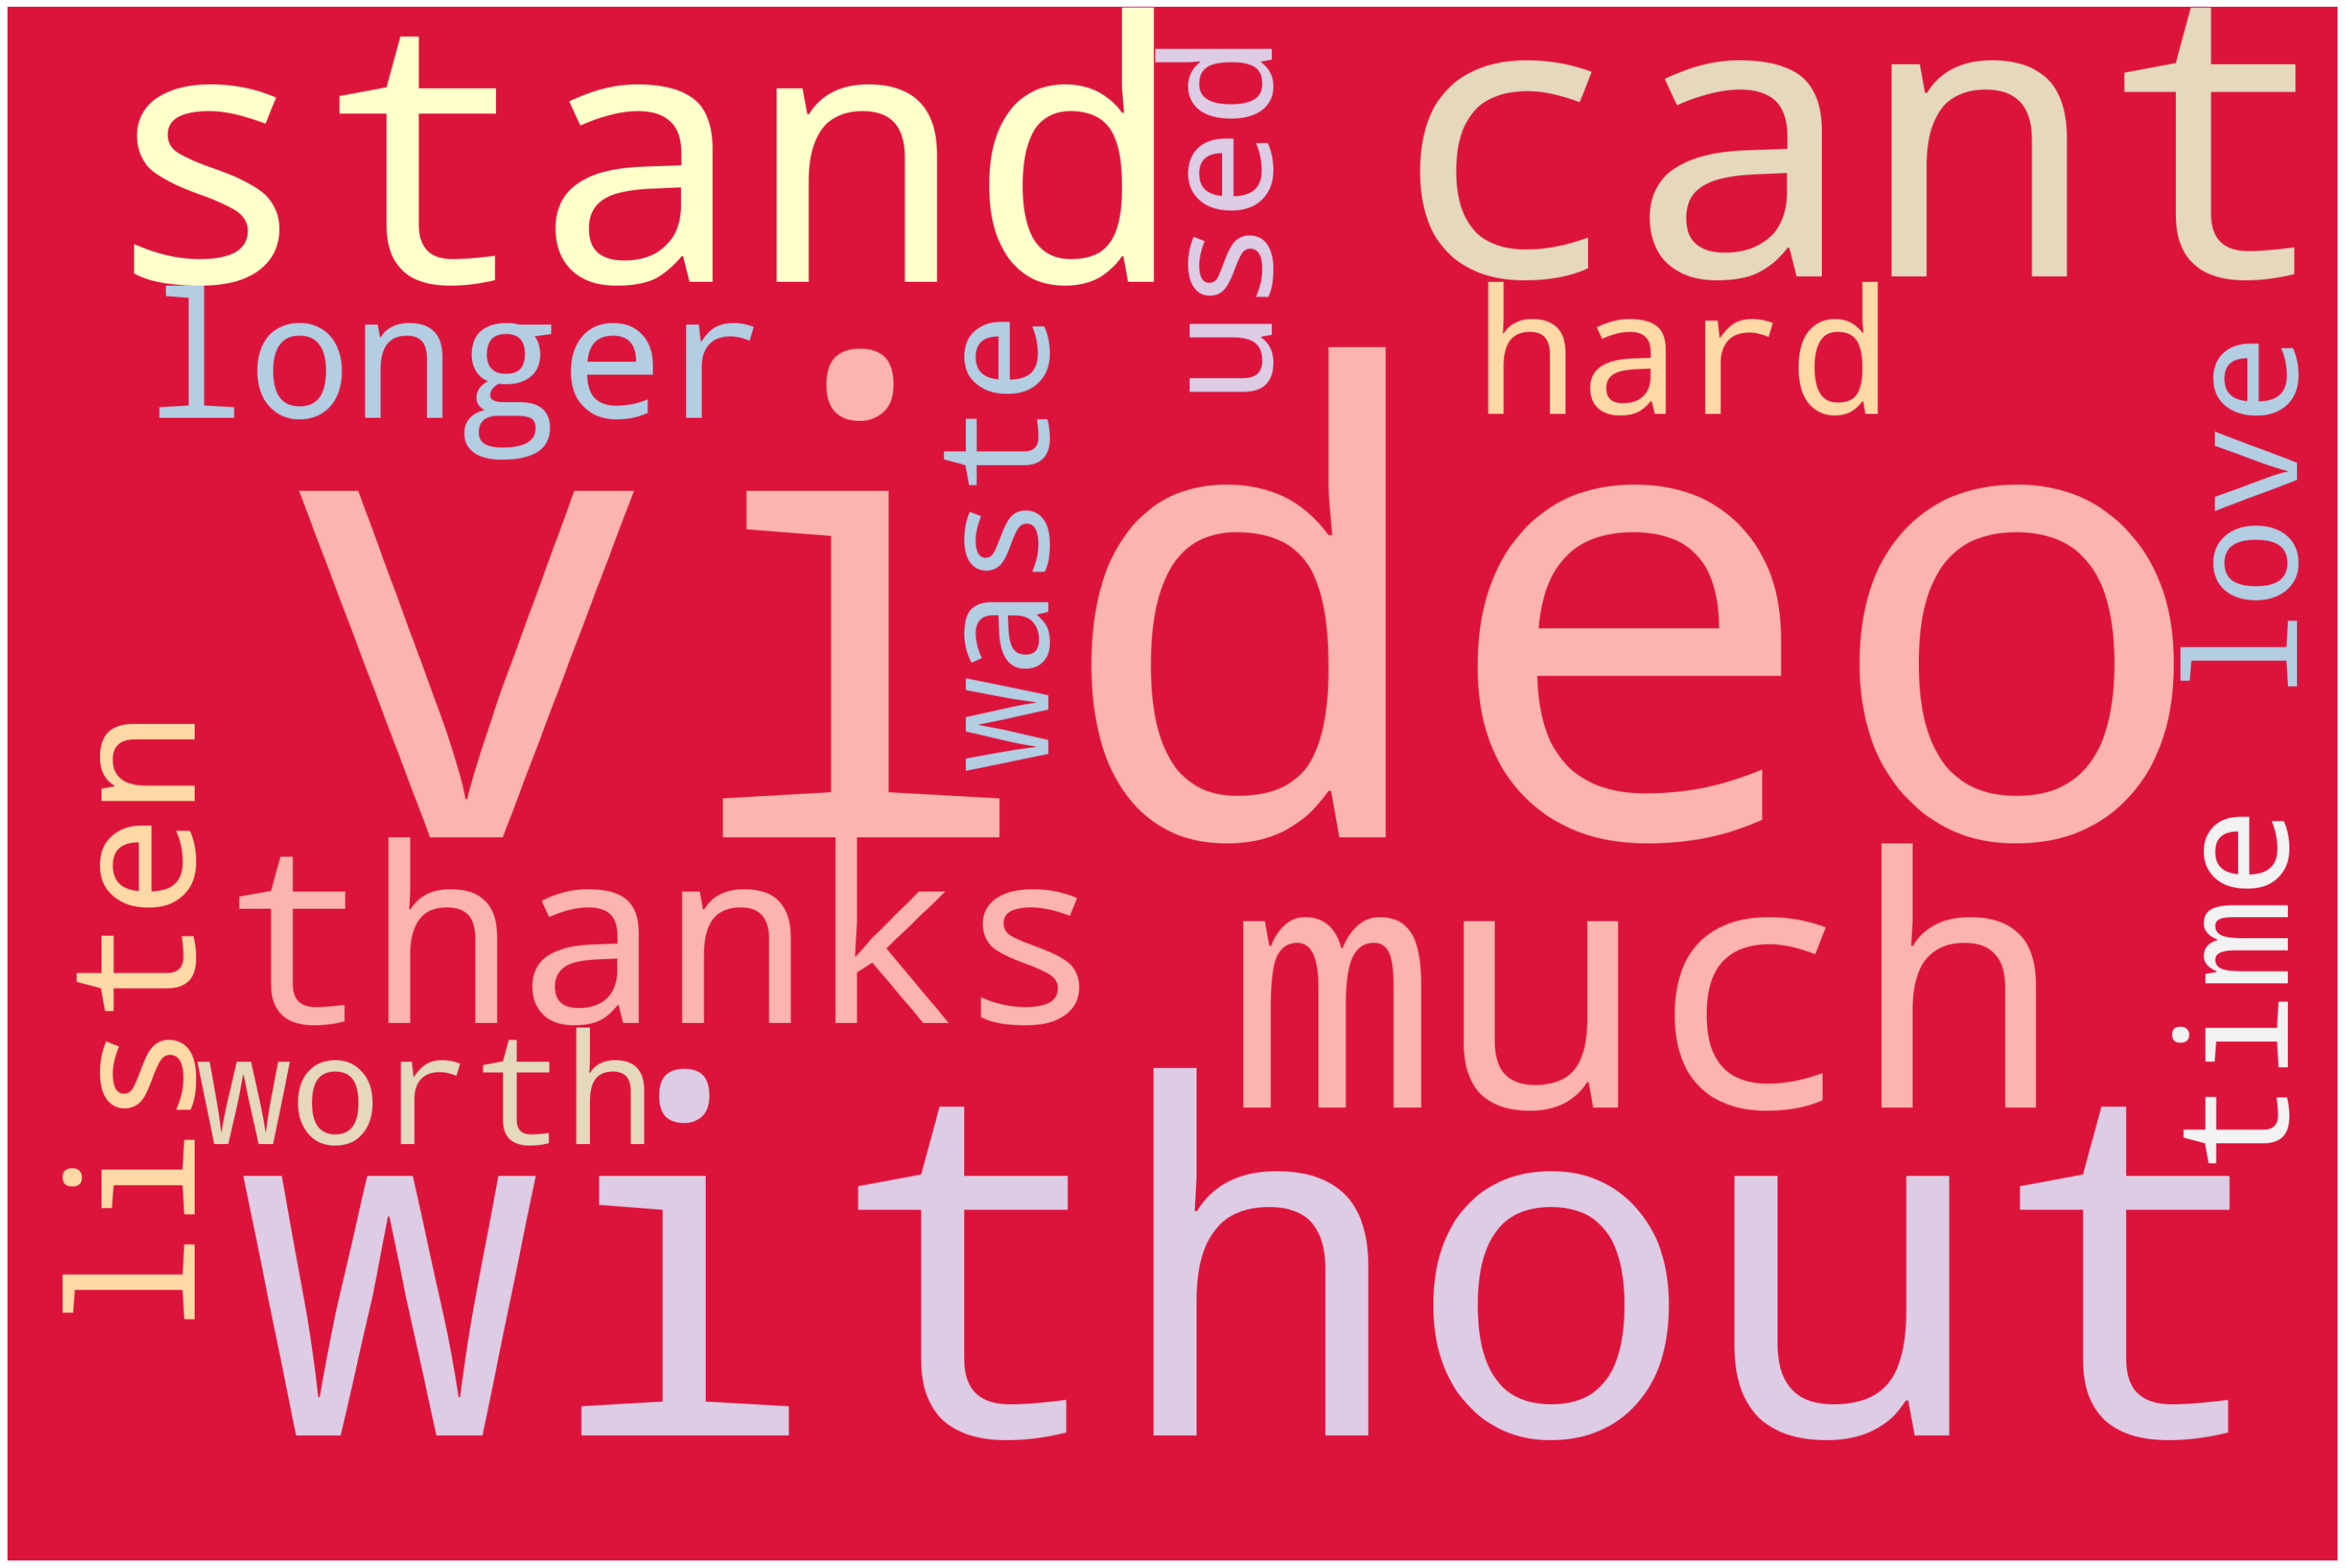

In [53]:
text = " ".join(review for review in business_negative_bigrams.NGram)

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color=color_2,
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text)

plot_cloud(wordcloud)

## Society-Culture Category

In [31]:
society_culture = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\PodcastReviews\\DataSets\\Society-Culture.csv",
    index_col=0,
)

In [15]:
X_test, y_test, X_train, y_train, vectorizer = train_model(society_culture, 3)
log_model, societyculture_trigrams = ngram_creation(X_train, y_train, vectorizer)

### Positive Trigrams

In [16]:
societyculture_positive_trigrams = societyculture_trigrams.head(10)
societyculture_positive_trigrams

NGram    Count  Coef
Index                                     
1252140     keep great work  1252140 3.087
1252024      keep good work  1252024 3.071
270521      cant get enough   270521 2.595
272843       cant wait hear   272843 2.587
1063494      i look forward  1063494 2.387
1066138      i love podcast  1066138 2.175
1452180      love love love  1452180 2.111
1037263         i cant wait  1037263 2.080
1053999  i highly recommend  1053999 2.043
1746          a must listen     1746 1.994

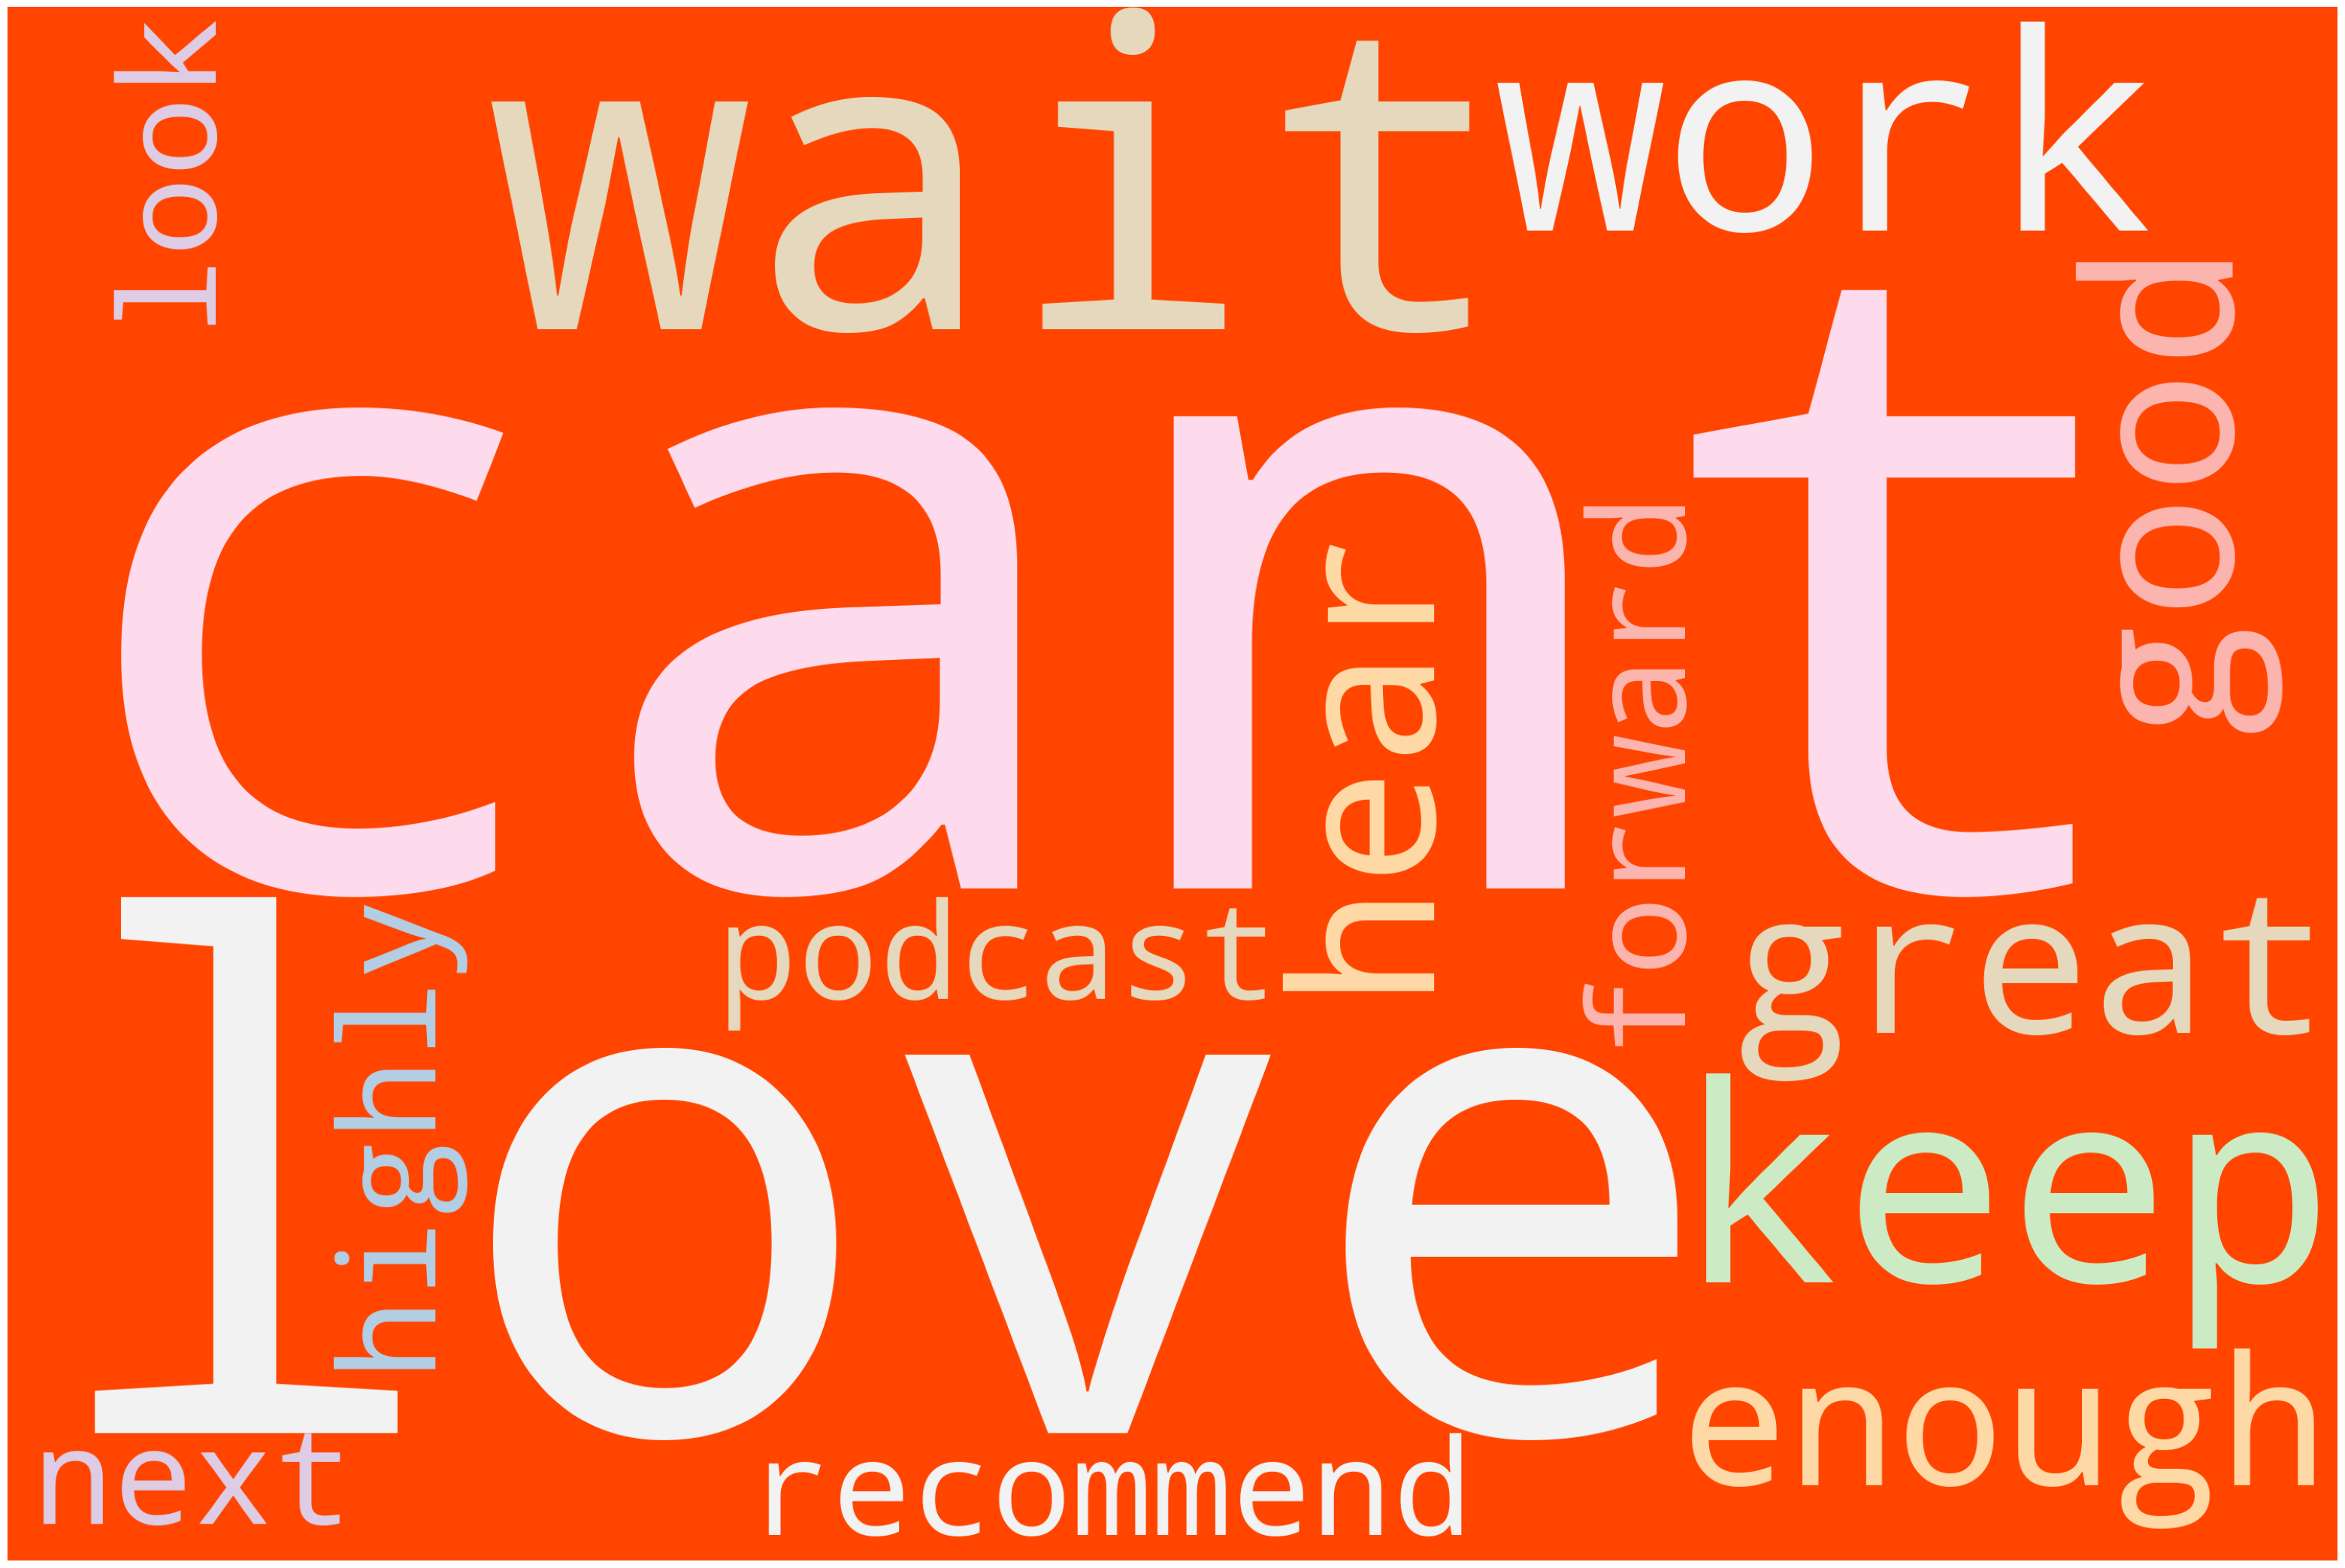

In [59]:
text = " ".join(review for review in societyculture_positive_trigrams.NGram)

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color=color_3,
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text)

plot_cloud(wordcloud)

### Negative Trigrams

In [17]:
societyculture_negative_trigrams = societyculture_trigrams.tail(10)
societyculture_negative_trigrams

NGram    Count   Coef
Index                                     
2410271  this podcast used  2410271 -2.492
270569       cant get past   270569 -2.515
1081532   i stop listening  1081532 -2.574
392575    couldnt get past   392575 -2.662
1037129      i cant listen  1037129 -2.704
2542308  used love podcast  2542308 -2.970
1087926        i used love  1087926 -2.994
1089328      i wanted like  1089328 -3.203
1668071     not worth time  1668071 -3.348
517491     dont waste time   517491 -4.560

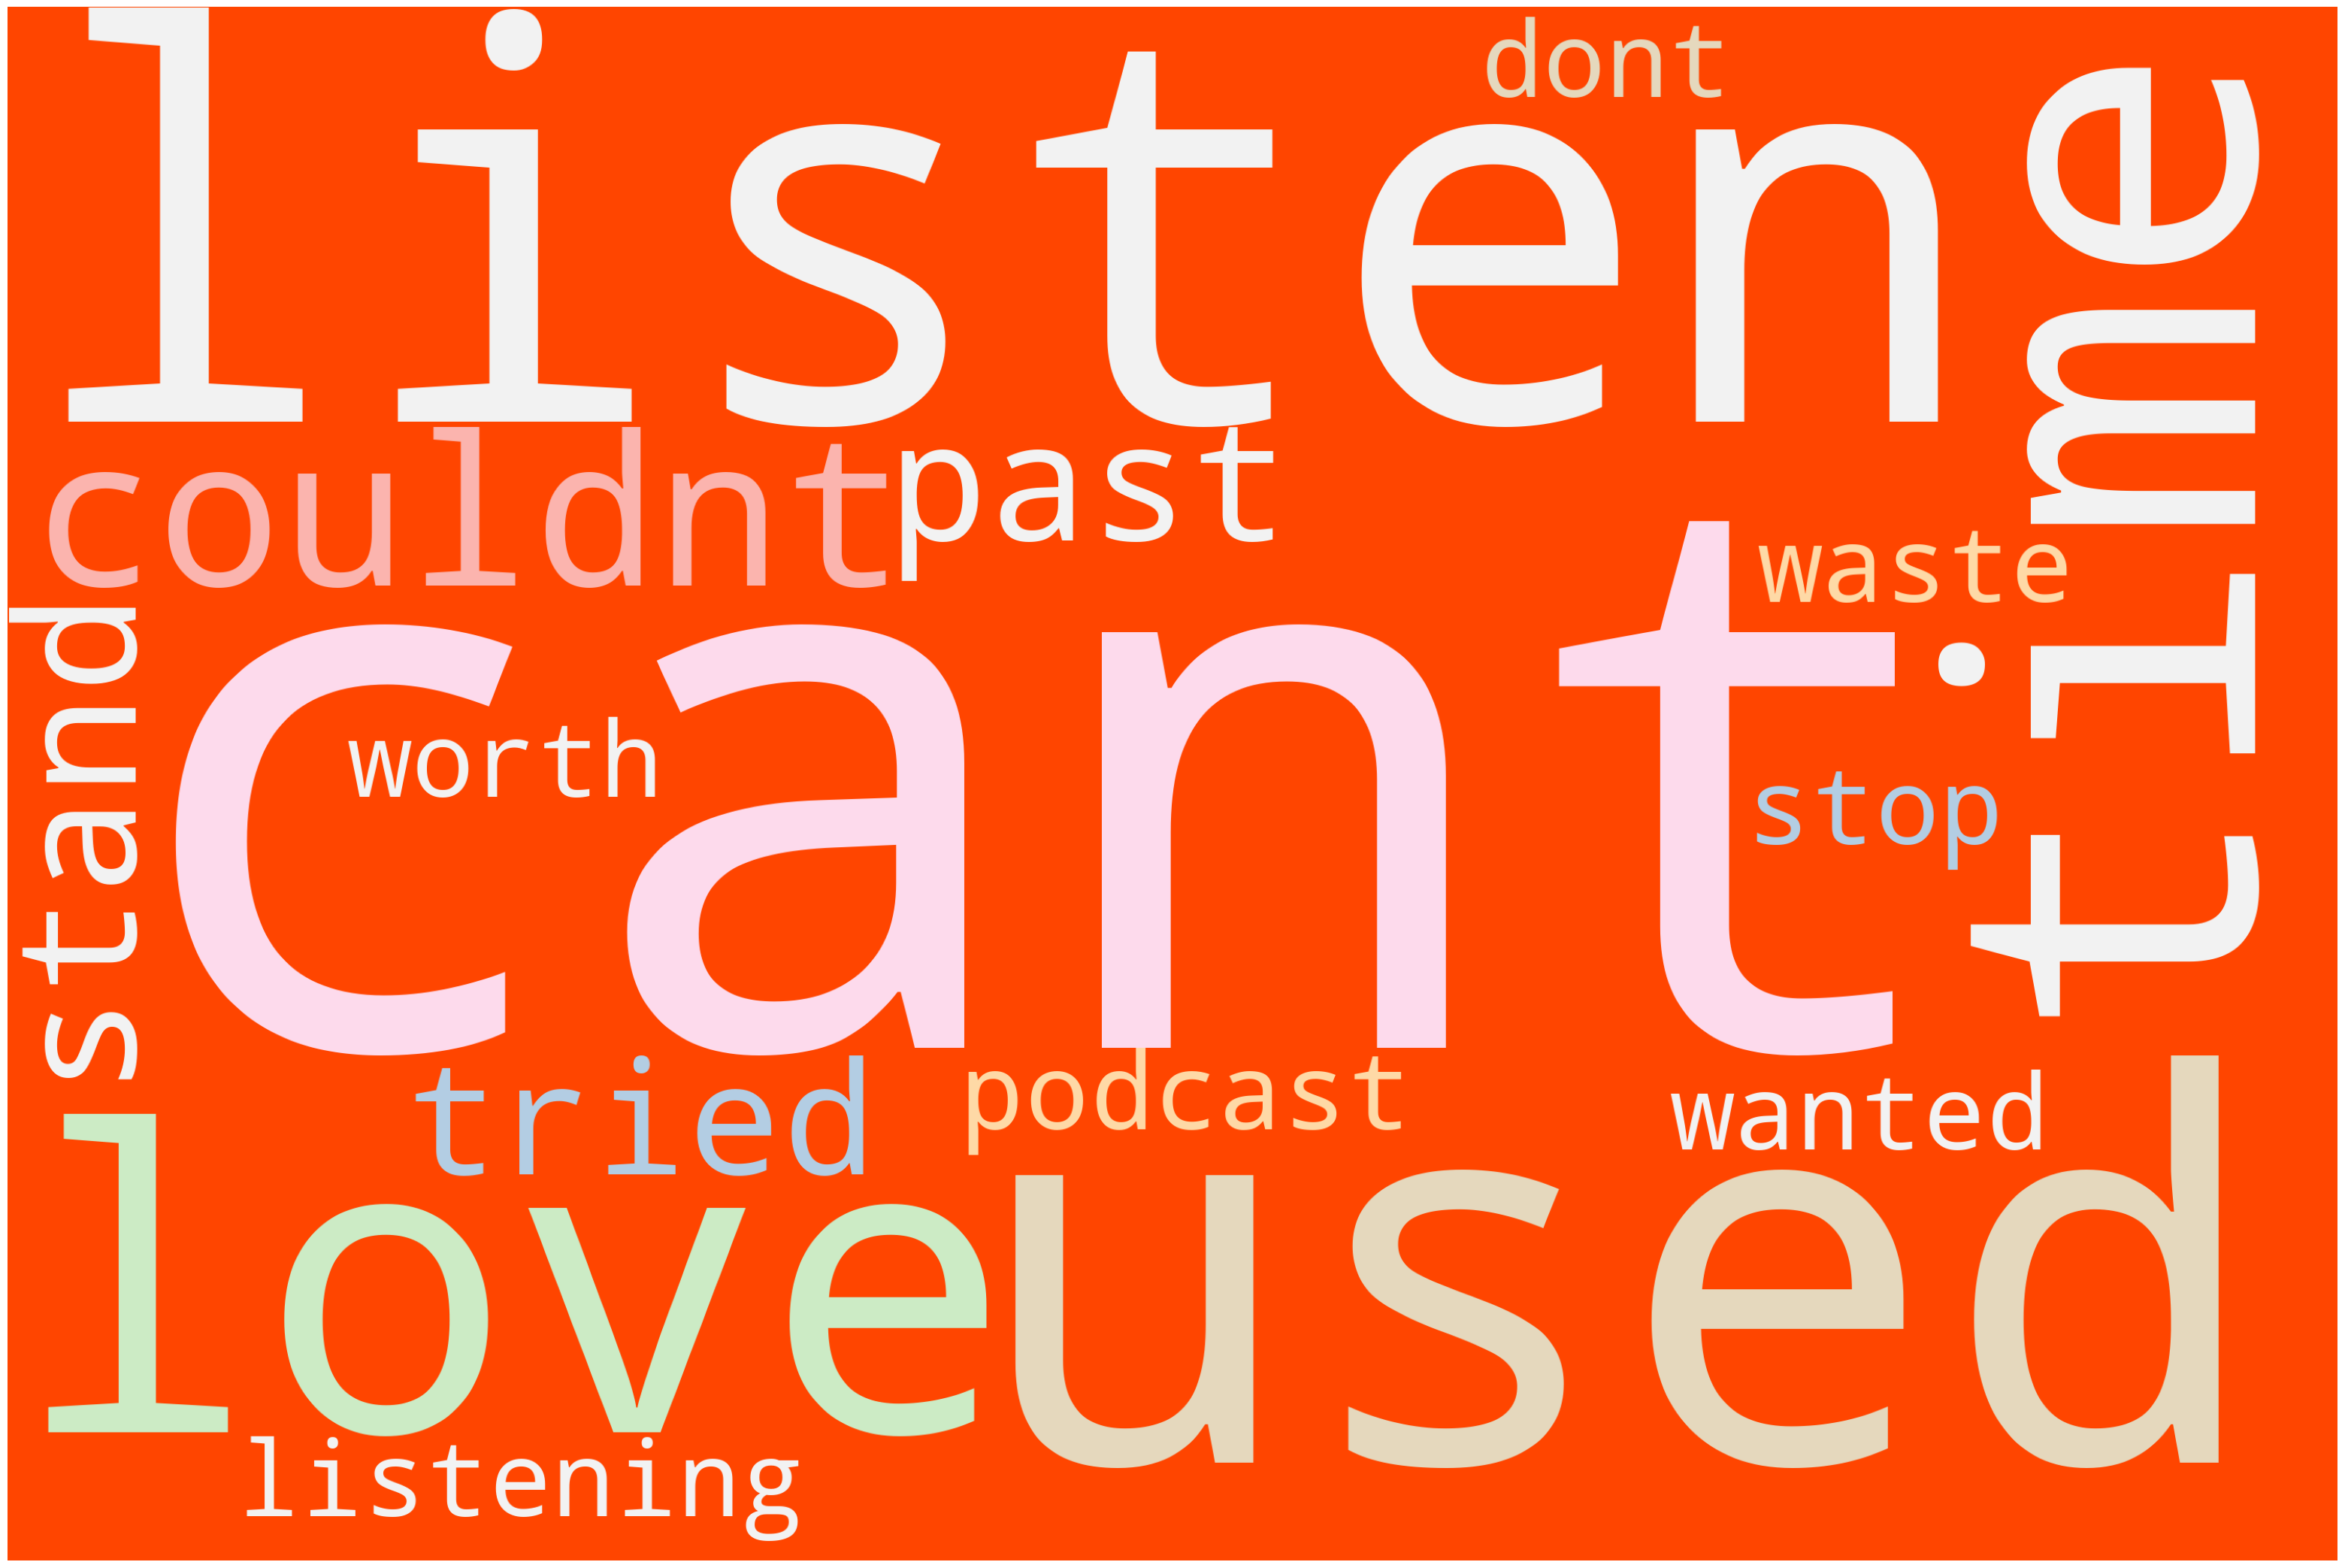

In [63]:
text = " ".join(review for review in societyculture_negative_trigrams.NGram)

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color=color_3,
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text)

plot_cloud(wordcloud)

### Section Summary
> * In this section, I looked at the most frequent positive and negative words used in the content. 
> * For reviews of all categories combined, I tokenized and Lemmatized the content first. 
> * I also worked with three podcast categories with the most number of reviews: Comedy, Business, and Society-Culture. I also worked with the entire dataset consisting of all the reviews. 
> * For the Comedy Category, I used unigrams, for the Business Category, bigrams and for the Society-Culture Category, Trigrams. 
> * By creating a machine learning model, and training it with positive and negative reviews, I created a logistic regression for each. This allowed me to identify the most frequent negative and positive ngrams. 
> * The coefficients clearly showed which ngrams were mostly positive and which were mostly negative.
> * I also created word clouds for the top 10 positive ngrams and the top 10 negative ones. 
> * The processes provided results showing the positive and negative expressions used in the reviews.

# Conclusions

In this section, I summarize the conclusions that can and cannot be drawn from this report. 

>* **Number of Reviews in this Analysis:** I analyzed the reviews of nearly 2 million reviews of about 100,000 podcasts.  <br>
>* **The Sentiments of Podcast Listeners:** This analysis showed that about 80% of reviewers were those who rated the podcast with 4 or 5 stars. This fact, makes the results of this analysis highly suspect and I can not come to a sure conclusion about the general sentiments of the podcast listener population. What about those who did not write any reviews? Were they satisfied, or dissatisfied? <br> 
>* **Recommendations for Podcast Creators:** I set the ambitious goal of being able to inform current and future podcast creators what they can do better to create more appealing podcasts. However, with this analysis, I cannot form any definitive recommendations for podcast creators.  I wanted to find words, phrases or sentences that specifically addressed issues that the reviewer liked or disliked. Instead, I found general positive and negative words that were not useful. 

# Suggestions for Improvement

This report has certain weaknesses. In this section, I outline what those weaknesses and some avenues for improvement. 

>* **Reviews:** Of the nearly 2 million reviews, over 1.5 million were from those who gave the podcast a 5-star. This report could be improved if we know more about those who did not write any reviews. Who are they? What are their thoughts? Why did they not write a review? These are important questions that need to be answered. <br>
>* **Sentiment Analysis:** This was my first experience with sentiment analysis and I found it not just a science but also an art. I experimented with various tools and methods of cleaning the text with mixed results. Learning more about this science/art will improve future reports of a similar kind. <br>
>* **Spell Corrector:** I tested various ways to correct the spelling of the reviews. My research showed that this too is both an art and a science. Learning more about this science/art will improve future reports. <br>
>* **Lemmatization:** Similar to spelling correction, I found various tools for lemmatization. None of them provided what I would call excellent results. This too seems to be both an art and a science. I hope to become better at it. <br>
>* **Lambda Functions:** I used lambda functions in several instances in this report. These functions loop through the data frame, which is much slower than using vectorization which performs multiple operations at once. This is how Panda and Numpy operations work. I will be aware of this issue in future reports.
>* **Type Hinting:** Make my functions clearer by using type hinting, to indicate the type of the variables within the functions.<br>
>* **Pandas:** I will continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
>* **SQL:** I will continue to increase my knowledge of SQL and become more skilled in this language.<br>
>* **Seaborn and Matplotlib:** I will continue to improve my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
>* **Python Code:** I will continue to write better and more efficient Python code. <br>
>* **Clean Code:** I will continue to adhere to the principles of writing clean code. <br>
>* **Readability and Efficiency:** I will continue to improve my skills to find the delicate balance between readability and efficiency in coding.<br>